In [4]:
%load_ext autoreload

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s') # NOTSET, DEBUG, INFO, WARN, ERROR, CRITICAL

from JPAS_DA import global_setup

from JPAS_DA.data import loading_tools
from JPAS_DA.data import cleaning_tools
from JPAS_DA.data import crossmatch_tools
from JPAS_DA.data import process_dset_splits
from JPAS_DA.data import wrapper_data_loaders

from JPAS_DA.models import model_building_tools
from JPAS_DA.training import save_load_tools
from JPAS_DA.evaluation import evaluation_tools
from JPAS_DA.wrapper_wandb import wrapper_tools
from JPAS_DA.evaluation import evaluation_tools

from JPAS_DA.evaluation import wandb_evaluation_tools

import os
import torch
import numpy as np
import fitsio

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from JPAS_DA.utils import plotting_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')
font, rcnew = plotting_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%matplotlib widget

from JPAS_DA.utils import aux_tools
aux_tools.set_seed(42)

In [5]:
path_wandb_sweep_no_DA = os.path.join(global_setup.path_models, "wandb_no_DA_latent_2")
N_selected_sweeps_no_DA = 1

In [6]:
path_wandb_sweep_DA = os.path.join(global_setup.path_models, "wandb_DA_latent_2")
N_selected_sweeps_DA = 1

2025-09-10 09:04:11,841 - INFO - 🔍 Scanning sweep folders in: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2
2025-09-10 09:04:11,842 - INFO - 📁 Found 2 sweep directories.
2025-09-10 09:04:11,845 - WARNING - ⚠️ Skipping my-sweep-1: missing register.txt
/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/JPAS_DA/evaluation/wandb_evaluation_tools.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


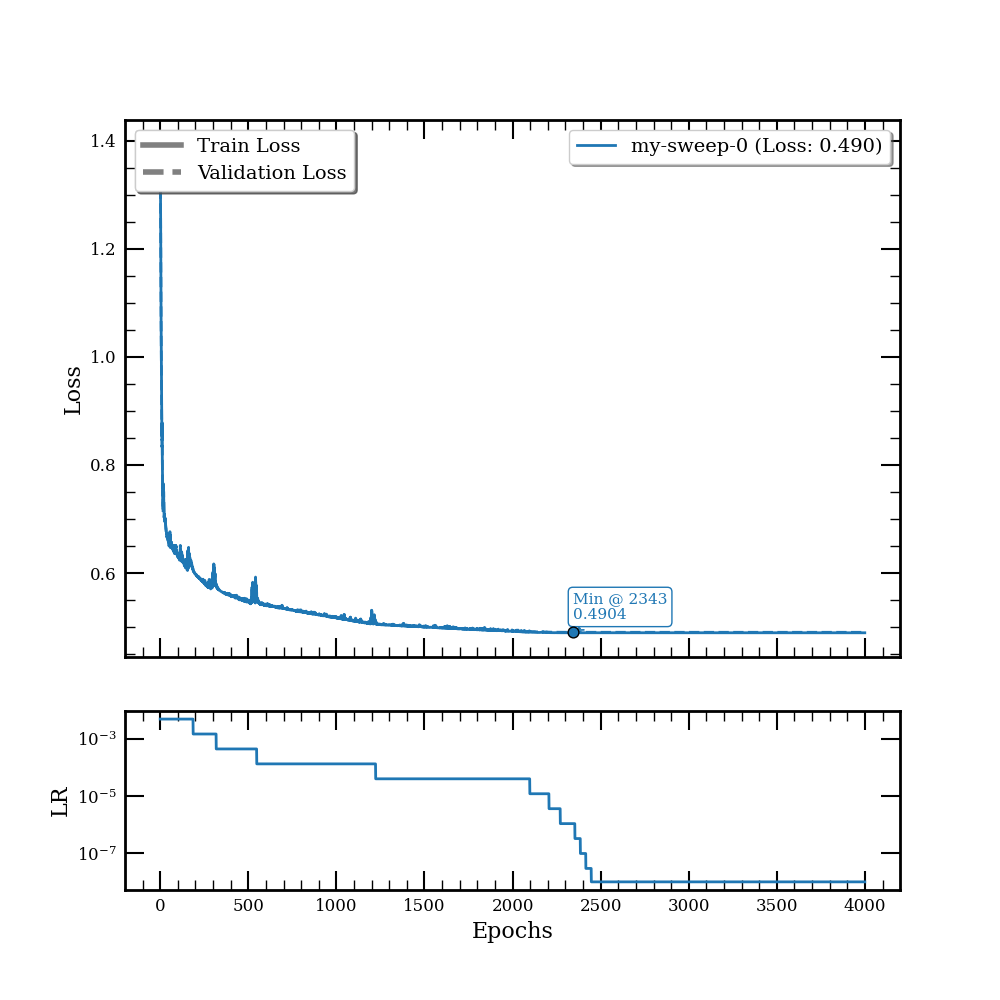

2025-09-10 09:04:12,037 - INFO - ✅ Plotted best runs.


In [7]:
sorted_list_sweep_names_no_DA, sorted_losses_no_DA = wandb_evaluation_tools.load_and_plot_sorted_sweeps(path_wandb_sweep_no_DA, max_runs_to_plot=N_selected_sweeps_no_DA)

2025-09-10 09:04:12,519 - INFO - 🔍 Scanning sweep folders in: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_DA_latent_2
2025-09-10 09:04:12,519 - INFO - 📁 Found 2 sweep directories.
2025-09-10 09:04:12,521 - WARNING - ⚠️ Skipping my-sweep-1: missing register.txt


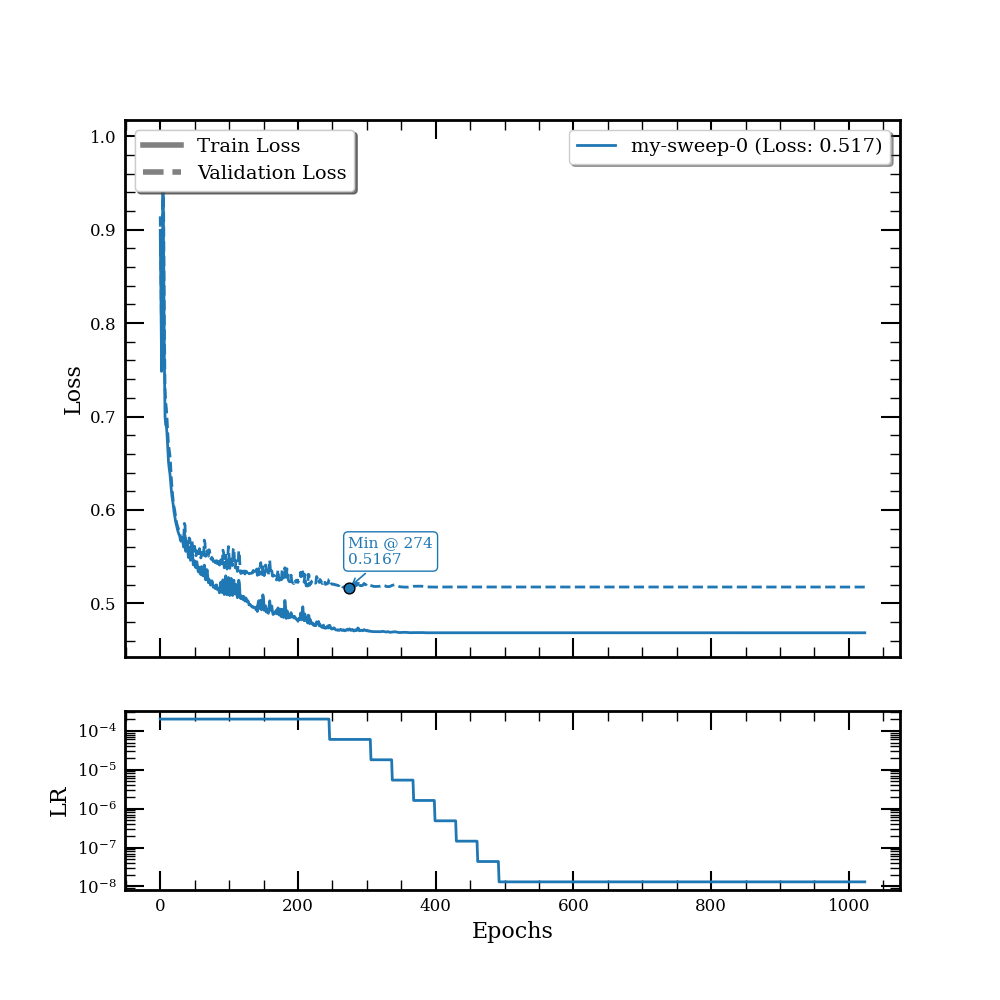

2025-09-10 09:04:12,699 - INFO - ✅ Plotted best runs.


In [8]:
sorted_list_sweep_names_DA, sorted_losses_DA = wandb_evaluation_tools.load_and_plot_sorted_sweeps(path_wandb_sweep_DA, max_runs_to_plot=N_selected_sweeps_DA)

In [9]:
paths_load_no_DA = [os.path.join(path_wandb_sweep_no_DA, sweep_name) for sweep_name in sorted_list_sweep_names_no_DA[:N_selected_sweeps_no_DA]]

In [10]:
paths_load_DA = [os.path.join(path_wandb_sweep_DA, sweep_name) for sweep_name in sorted_list_sweep_names_DA[:N_selected_sweeps_DA]]

In [11]:
return_keys=['val_DESI_only', 'test_JPAS_matched']
define_dataset_loaders_keys=['DESI_only', 'JPAS_matched']
keys_yy=["SPECTYPE_int", "TARGETID", "DESI_FLUX_R"]

In [12]:
RESULTS_no_DA = evaluation_tools.evaluate_results_from_load_paths(
    paths_load=paths_load_no_DA, return_keys=return_keys, define_dataset_loaders_keys=define_dataset_loaders_keys, keys_yy=keys_yy
)

2025-09-10 09:04:14,945 - INFO - 🔍 Validating model configs...
2025-09-10 09:04:14,946 - INFO - 🔍 Checking for config file at: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2/my-sweep-0/config.yaml
2025-09-10 09:04:14,949 - INFO - ✅ Successfully loaded config file: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2/my-sweep-0/config.yaml
2025-09-10 09:04:14,949 - INFO - 📥 Loading means from: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2/my-sweep-0/means.npy
2025-09-10 09:04:14,949 - INFO - 📥 Loading stds from: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2/my-sweep-0/stds.npy
2025-09-10 09:04:14,952 - INFO - 

1️⃣: Loading datasets from disk...
2025-09-10 09:04:14,952 - INFO - 📥 Starting full dataset loading with `load

In [13]:
return_keys=['train_JPAS_matched', 'test_JPAS_matched']
define_dataset_loaders_keys=['JPAS_matched']
keys_yy=["SPECTYPE_int", "TARGETID", "DESI_FLUX_R"]

In [14]:
RESULTS_DA = evaluation_tools.evaluate_results_from_load_paths(
    paths_load=paths_load_DA, return_keys=return_keys, define_dataset_loaders_keys=define_dataset_loaders_keys, keys_yy=keys_yy
)

2025-09-10 09:04:50,144 - INFO - 🔍 Validating model configs...
2025-09-10 09:04:50,144 - INFO - 🔍 Checking for config file at: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_DA_latent_2/my-sweep-0/config.yaml
2025-09-10 09:04:50,146 - INFO - ✅ Successfully loaded config file: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_DA_latent_2/my-sweep-0/config.yaml
2025-09-10 09:04:50,146 - INFO - 📥 Loading means from: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2/my-sweep-0/means.npy
2025-09-10 09:04:50,146 - INFO - 📥 Loading stds from: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2/my-sweep-0/stds.npy
2025-09-10 09:04:50,147 - INFO - 📥 Loading means from: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/w

In [15]:
n_classes = len(np.unique(RESULTS_no_DA[0]['val_DESI_only']['label']))

if n_classes == 2:
    class_names = ['QSO_high', 'no_QSO_high']
    manually_select_one_SPECTYPE_vs_rest = 'QSO_high'
else:
    class_names = global_setup.class_names
    manually_select_one_SPECTYPE_vs_rest = None

In [16]:
ii_model = 0
IDs_only_1, IDs_only_2, IDs_both, idxs_only_1, idxs_only_2, idxs_both_1, idxs_both_2 = crossmatch_tools.crossmatch_IDs_two_datasets(
    RESULTS_no_DA[ii_model]["test_JPAS_matched"]['TARGETID'],
    RESULTS_DA[ii_model]["test_JPAS_matched"]['TARGETID']
)
# message asserting that all TARGETIDs are matched
assert len(IDs_only_1) == 0, f"IDs only in no DA: {IDs_only_1}"
assert len(IDs_only_2) == 0, f"IDs only in DA: {IDs_only_2}"
assert len(IDs_both) == len(RESULTS_no_DA[ii_model]["test_JPAS_matched"]['TARGETID']), f"Something wrong"

2025-09-10 09:05:14,221 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-09-10 09:05:14,222 - INFO - ├── 🚀 Starting ID categorization process...
2025-09-10 09:05:14,223 - INFO - |    ├── 📌 Found 9454 unique IDs across 2 arrays.
2025-09-10 09:05:14,225 - INFO - |    ├── Presence matrix created with shape: (2, 9454)
2025-09-10 09:05:14,225 - INFO - |    ├── Category mask created with shape: (2, 9454)
2025-09-10 09:05:14,226 - INFO - ├── 🚀 Starting index retrieval process...
2025-09-10 09:05:14,226 - INFO - |    ├── 📌 Processing 9454 unique IDs across 2 arrays.
2025-09-10 09:05:14,229 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-09-10 09:05:14,229 - INFO - |    ├── Processing complete: 0 IDs only in Array 1 (0.0%).
2025-09-10 09:05:14,230 - INFO - |    ├── Processing complete: 0 IDs only in Array 2 (0.0%).
2025-09-10 09:05:14,230 - INFO - |    ├── Processing complete: 9454 IDs in both arrays (100.0%).
2025-09-10 09:05:14,230 - INFO - ✅ Finished crossmatc

In [17]:
JPAS_Ignasi = fitsio.read("/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/DATA/jpas_idr_classification_xmatch_desi_dr1.fits.gz")

yy_true_Ignasi = np.array(JPAS_Ignasi['SPECTYPE'][JPAS_Ignasi["is_in_desi_dr1"]])
yy_true_Ignasi = list(np.array(yy_true_Ignasi).astype(np.str_))
REDSHIFT = np.array(JPAS_Ignasi['z'][JPAS_Ignasi["is_in_desi_dr1"]])
# Split between High and Low redshift quasars
z_lim_QSO_cut = 2.1
for ii in range(len(yy_true_Ignasi)):
    if yy_true_Ignasi[ii] == "QSO":
        if REDSHIFT[ii] < z_lim_QSO_cut:
            yy_true_Ignasi[ii] = "QSO_low"
        else:
            yy_true_Ignasi[ii] = "QSO_high"

# (optional): if manually_select_one_SPECTYPE_vs_rest is specified, restrict the surveys SPECTYPE to that class
if manually_select_one_SPECTYPE_vs_rest != None:
    logging.info("├── Restricting the surveys SPECTYPE to " + str(manually_select_one_SPECTYPE_vs_rest))
    for ii in range(len(yy_true_Ignasi)):
        if yy_true_Ignasi[ii] != manually_select_one_SPECTYPE_vs_rest:
            yy_true_Ignasi[ii] = "no_" + manually_select_one_SPECTYPE_vs_rest

yy_true_Ignasi, class_mapping = cleaning_tools.encode_strings_to_integers(yy_true_Ignasi)


classification_keys = {
    "TRANS": ['conf_gal_TRANS', 'conf_hqso_TRANS', 'conf_lqso_TRANS', 'conf_star_TRANS'],
    "CBM": ['conf_gal_CBM', 'conf_hqso_CBM', 'conf_lqso_CBM', 'conf_star_CBM']
}

yy_pred_P = {}
for model_key, feature_keys in classification_keys.items():
    # Extract all probabilities (shape: [N_samples, N_classes])
    model_probs = np.array([
        JPAS_Ignasi[key][JPAS_Ignasi["is_in_desi_dr1"]] for key in feature_keys
    ]).T

    if manually_select_one_SPECTYPE_vs_rest is None:
        # Standard multiclass case
        yy_pred_P[model_key] = model_probs
    else:
        # Map SPECTYPE to index in original class list
        name_map = {
            "GALAXY": "conf_gal_",
            "QSO_high": "conf_hqso_",
            "QSO_low": "conf_lqso_",
            "STAR": "conf_star_"
        }
        positive_key = name_map[manually_select_one_SPECTYPE_vs_rest] + model_key

        idx_positive = feature_keys.index(positive_key)
        idx_all = np.arange(len(feature_keys))
        idx_rest = np.delete(idx_all, idx_positive)

        positive_probs = model_probs[:, idx_positive]
        rest_probs = model_probs[:, idx_rest].sum(axis=1)
        yy_pred_P[model_key] = np.stack([positive_probs, rest_probs], axis=1)

yy_pred_P["TRANS"].shape, yy_pred_P["CBM"].shape


IDs_only_1, IDs_only_2, IDs_both, idxs_only_1, idxs_only_2, idxs_both_1, idxs_both_2 = crossmatch_tools.crossmatch_IDs_two_datasets(
    RESULTS_no_DA[ii_model]["test_JPAS_matched"]['TARGETID'],
    np.array(JPAS_Ignasi["TARGETID"][JPAS_Ignasi["is_in_desi_dr1"]])
)
idxs_both_me = np.concatenate(idxs_both_1)
idxs_both_Ignasi = np.concatenate(idxs_both_2)

yy_true_Ignasi_crossmatch = yy_true_Ignasi[idxs_both_Ignasi]
yy_pred_P_Ignasi_crossmatch_CBM = yy_pred_P["CBM"][idxs_both_Ignasi]
yy_pred_P_Ignasi_crossmatch_TRANS = yy_pred_P["TRANS"][idxs_both_Ignasi]

2025-09-10 09:05:18,395 - INFO - ├── 🔑 Starting encoding process for string list...
2025-09-10 09:05:18,423 - INFO - |    ├── 📌 New Mapping Created: {'GALAXY': 0, 'QSO_high': 1, 'QSO_low': 2, 'STAR': 3}
2025-09-10 09:05:18,423 - INFO - │    ├── 📊 Category Breakdown (102442 total):
2025-09-10 09:05:18,423 - INFO - │    │   ├── GALAXY          → 65791 (64.22%)
2025-09-10 09:05:18,424 - INFO - │    │   ├── QSO_high        →  4042 (3.95%)
2025-09-10 09:05:18,424 - INFO - │    │   ├── QSO_low         →  4721 (4.61%)
2025-09-10 09:05:18,424 - INFO - │    │   ├── STAR            → 27888 (27.22%)
2025-09-10 09:05:18,424 - INFO - ├── ✅ Encoding complete (4 categories).
2025-09-10 09:05:18,553 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-09-10 09:05:18,553 - INFO - ├── 🚀 Starting ID categorization process...
2025-09-10 09:05:18,557 - INFO - |    ├── 📌 Found 100787 unique IDs across 2 arrays.
2025-09-10 09:05:18,567 - INFO - |    ├── Presence matrix created with shape: (2, 100787)
2025-09-10 

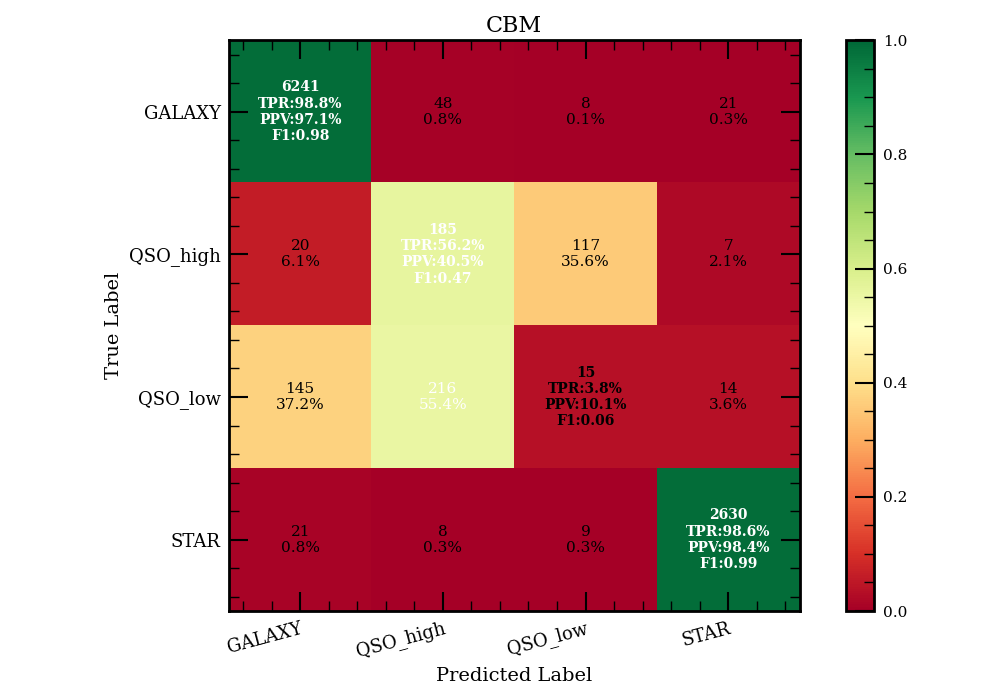

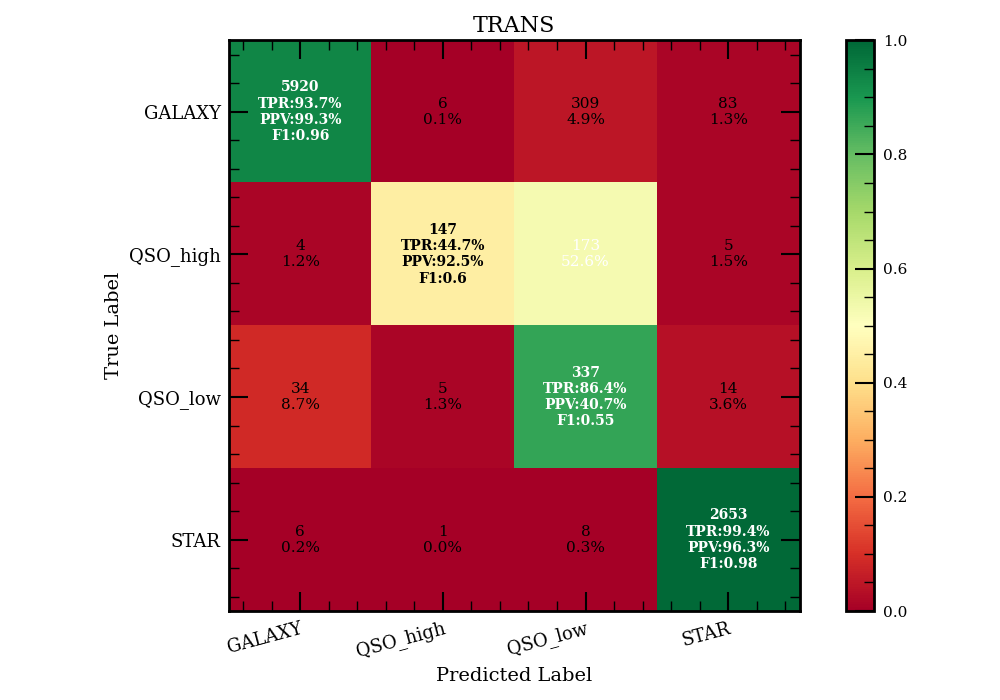

In [18]:
confusion_matrix = evaluation_tools.plot_confusion_matrix(
    yy_true_Ignasi_crossmatch, yy_pred_P_Ignasi_crossmatch_CBM,
    class_names=class_names, cmap=plt.cm.RdYlGn, title="CBM"
)

confusion_matrix = evaluation_tools.plot_confusion_matrix(
    yy_true_Ignasi_crossmatch, yy_pred_P_Ignasi_crossmatch_TRANS,
    class_names=class_names, cmap=plt.cm.RdYlGn, title="TRANS"
)

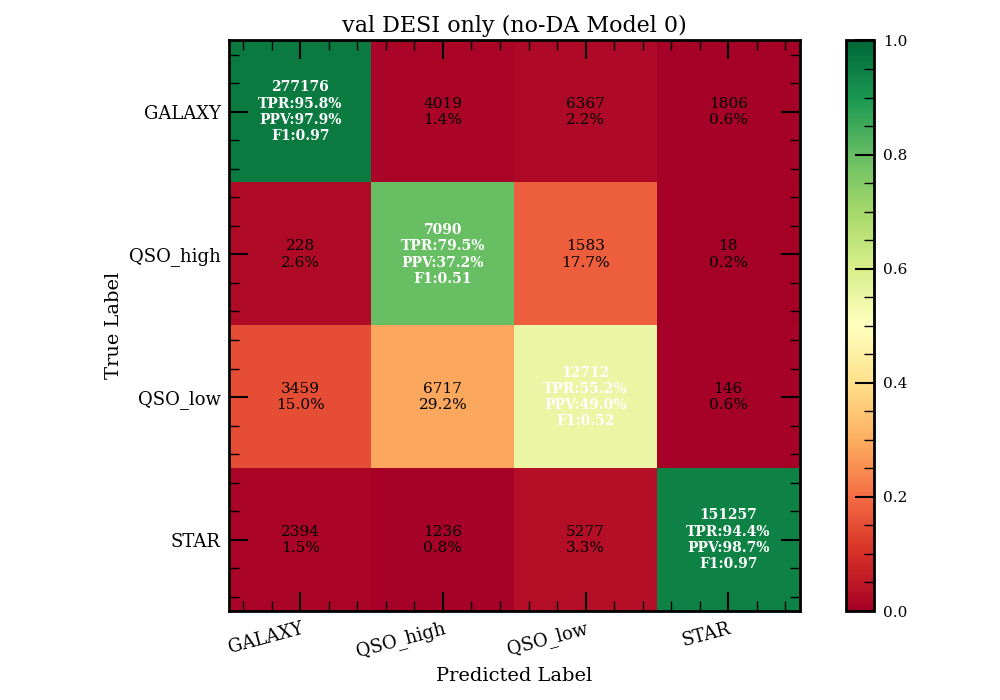

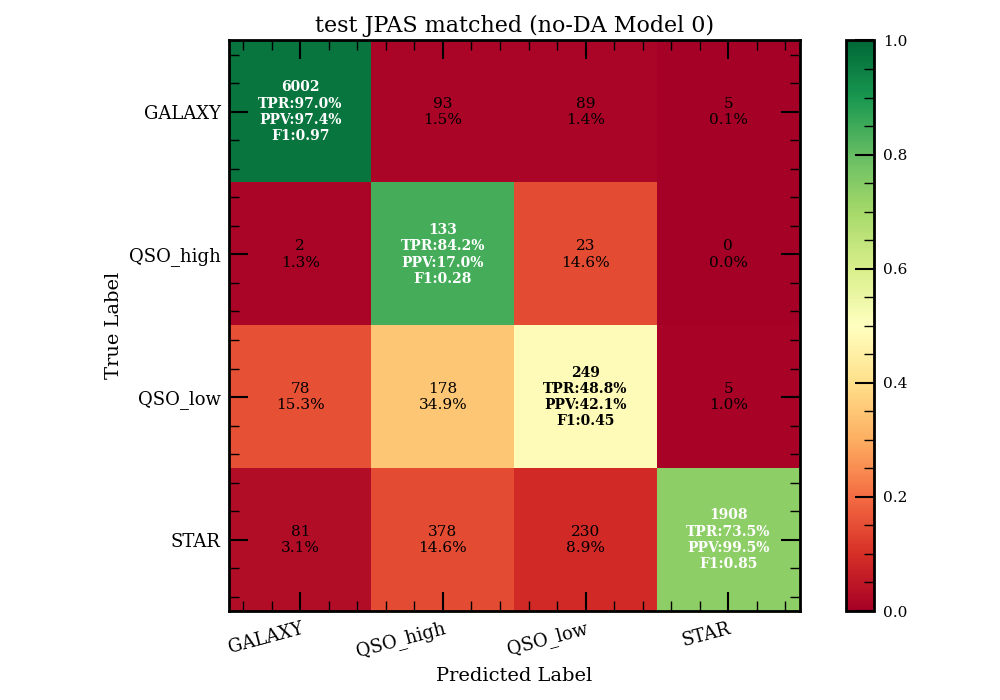

In [19]:
for model_idx, model_outputs in RESULTS_no_DA.items():
    for key, result in model_outputs.items():
        yy_true = result["true"]
        yy_pred = result["prob"]
        
        # Plot confusion matrix
        evaluation_tools.plot_confusion_matrix(
            yy_true,
            yy_pred,
            class_names=class_names,
            cmap=plt.cm.RdYlGn,
            title=f"{key.replace('_', ' ')} (no-DA Model {model_idx})"
        )

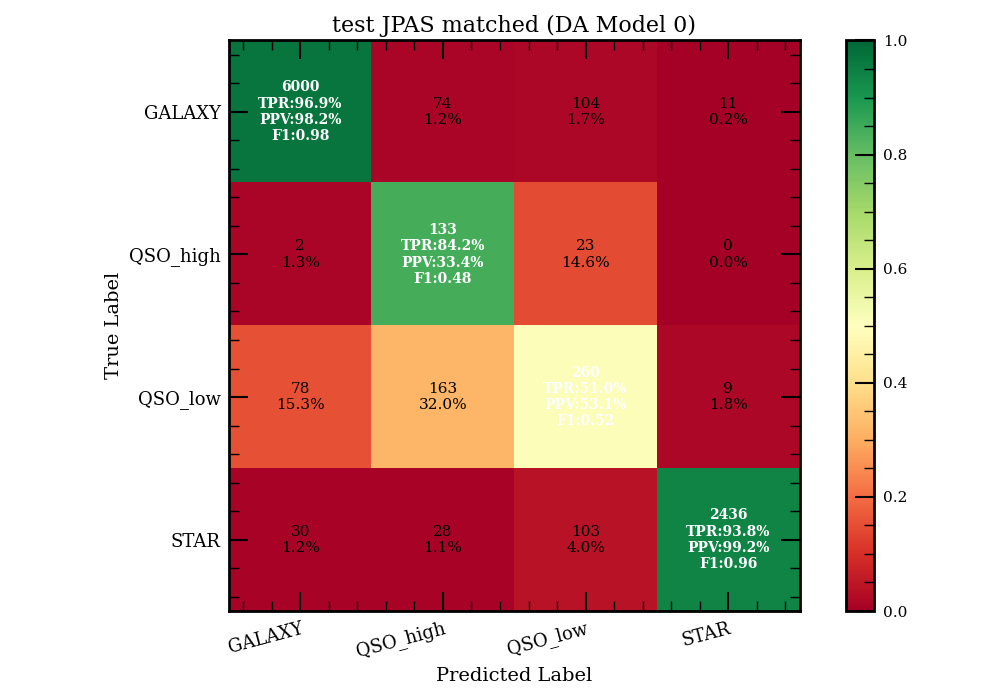

In [20]:
for model_idx in RESULTS_DA.keys():
    model_outputs = RESULTS_DA[model_idx]
    result = model_outputs["test_JPAS_matched"]
    yy_true = result["true"]
    yy_pred = result["prob"]

    evaluation_tools.plot_confusion_matrix(
        yy_true,
        yy_pred,
        class_names=class_names,
        cmap=plt.cm.RdYlGn,
        title=f"test JPAS matched (DA Model {model_idx})"
    )

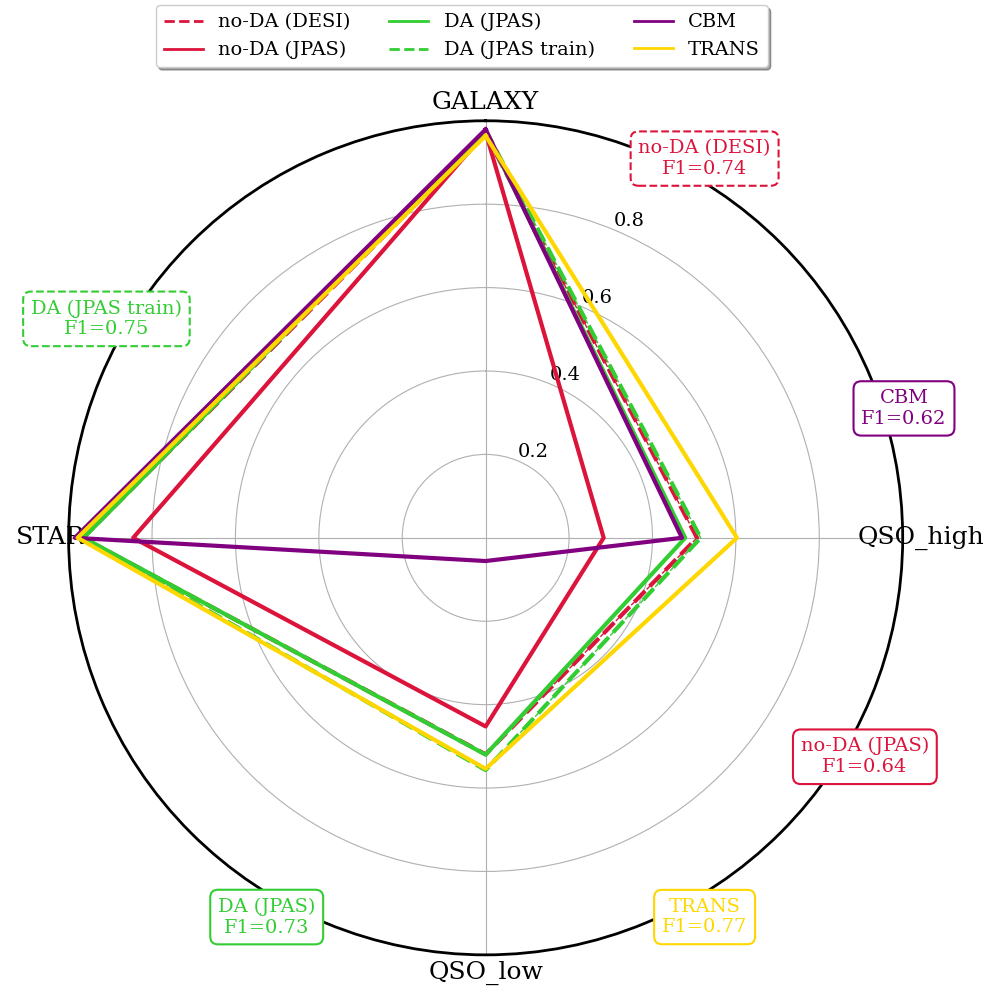

In [21]:
from sklearn.metrics import f1_score
from matplotlib.lines import Line2D

# === CONFIG ===
class_count = len(class_names)
angles = np.linspace(0, 2 * np.pi, class_count, endpoint=False).tolist()
angles += angles[:1]
radius_box = 1.05
text_fontsize = 14
linewidth_model = 1
linewidth_mean = 3
tick_labelsize = 18
radial_labelsize = 14
legend_fontsize = 16
title_fontsize = 20
title_pad = 50
figsize = (10, 10)

# === Prepare plot ===
fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), class_names, fontsize=tick_labelsize)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels([str(y) for y in [0.2, 0.4, 0.6, 0.8, 1.0]], fontsize=radial_labelsize)
# ax.set_title("F1 Radar Plot – no-DA vs DA vs CBM vs TRANS", fontsize=title_fontsize, pad=title_pad)

# === Style mapping ===
plot_config = [
    {
        'label': 'no-DA (DESI)',
        'results': RESULTS_no_DA,
        'models': list(RESULTS_no_DA.keys()),
        'dataset': 'val_DESI_only',
        'color': 'crimson',
        'linestyle': '--'
    },
    {
        'label': 'no-DA (JPAS)',
        'results': RESULTS_no_DA,
        'models': list(RESULTS_no_DA.keys()),
        'dataset': 'test_JPAS_matched',
        'color': 'crimson',
        'linestyle': '-'
    },
    {
        'label': 'DA (JPAS)',
        'results': RESULTS_DA,
        'models': list(RESULTS_DA.keys()),
        'dataset': 'test_JPAS_matched',
        'color': 'limegreen',
        'linestyle': '-'
    },
    {
        'label': 'DA (JPAS train)',
        'results': RESULTS_DA,
        'models': list(RESULTS_DA.keys()),
        'dataset': 'train_JPAS_matched',
        'color': 'limegreen',
        'linestyle': '--'
    }
]

legend_handles = []

# === Plot grouped models (RESULTS_no_DA, RESULTS_DA) ===
text_box_angles = np.linspace(0, 2 * np.pi, len(plot_config), endpoint=False) + np.pi / 6
for i, cfg in enumerate(plot_config):
    f1_scores_all = []
    for model_idx in cfg['models']:
        data = cfg['results'][model_idx][cfg['dataset']]
        f1 = f1_score(data['true'], data['label'], average=None, zero_division=0)
        f1_scores_all.append(f1)
        f1_plot = f1.tolist() + [f1[0]]
        ax.plot(angles, f1_plot, color=cfg['color'], linestyle=cfg['linestyle'], linewidth=linewidth_model)

    f1_mean = np.mean(np.stack(f1_scores_all), axis=0)
    f1_mean_plot = f1_mean.tolist() + [f1_mean[0]]
    ax.plot(angles, f1_mean_plot, color=cfg['color'], linestyle=cfg['linestyle'], linewidth=linewidth_mean)

    macro_f1 = np.mean(f1_mean)
    text_obj = ax.text(
        text_box_angles[i], radius_box,
        f"{cfg['label']}\nF1={macro_f1:.2f}",
        color=cfg['color'],
        fontsize=text_fontsize,
        ha="center", va="center",
        bbox=dict(facecolor='white', edgecolor=cfg['color'], boxstyle='round,pad=0.4', lw=1.5)
    )
    text_obj.get_bbox_patch().set_linestyle(cfg['linestyle'])
    
    legend_handles.append(Line2D([0], [0], color=cfg['color'], linestyle=cfg['linestyle'], lw=2, label=cfg['label']))

# === Plot CBM ===
f1_cbm = f1_score(yy_true_Ignasi_crossmatch, np.argmax(yy_pred_P_Ignasi_crossmatch_CBM, axis=1), average=None, zero_division=0)
f1_cbm_plot = f1_cbm.tolist() + [f1_cbm[0]]
ax.plot(angles, f1_cbm_plot, color='purple', linestyle='-', linewidth=linewidth_mean)
macro_cbm = np.mean(f1_cbm)
ax.text(
    np.pi / 2 - 0.3, radius_box,
    f"CBM\nF1={macro_cbm:.2f}",
    color='purple',
    fontsize=text_fontsize,
    ha="center", va="center",
    bbox=dict(facecolor='white', edgecolor='purple', boxstyle='round,pad=0.4', lw=1.5)
)
legend_handles.append(Line2D([0], [0], color='purple', linestyle='-', lw=2, label='CBM'))

# === Plot TRANS ===
f1_trans = f1_score(yy_true_Ignasi_crossmatch, np.argmax(yy_pred_P_Ignasi_crossmatch_TRANS, axis=1), average=None, zero_division=0)
f1_trans_plot = f1_trans.tolist() + [f1_trans[0]]
ax.plot(angles, f1_trans_plot, color='gold', linestyle='-', linewidth=linewidth_mean)
macro_trans = np.mean(f1_trans)
ax.text(
    np.pi / 2 + np.pi/3, radius_box,
    f"TRANS\nF1={macro_trans:.2f}",
    color='gold',
    fontsize=text_fontsize,
    ha="center", va="center",
    bbox=dict(facecolor='white', edgecolor='gold', boxstyle='round,pad=0.4', lw=1.5)
)
legend_handles.append(Line2D([0], [0], color='gold', linestyle='-', lw=2, label='TRANS'))

# === Add legend ===
ax.legend(handles=legend_handles, bbox_to_anchor=(0.85, 1.15),
          ncol=3, fontsize=legend_fontsize - 2, title_fontsize=legend_fontsize, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

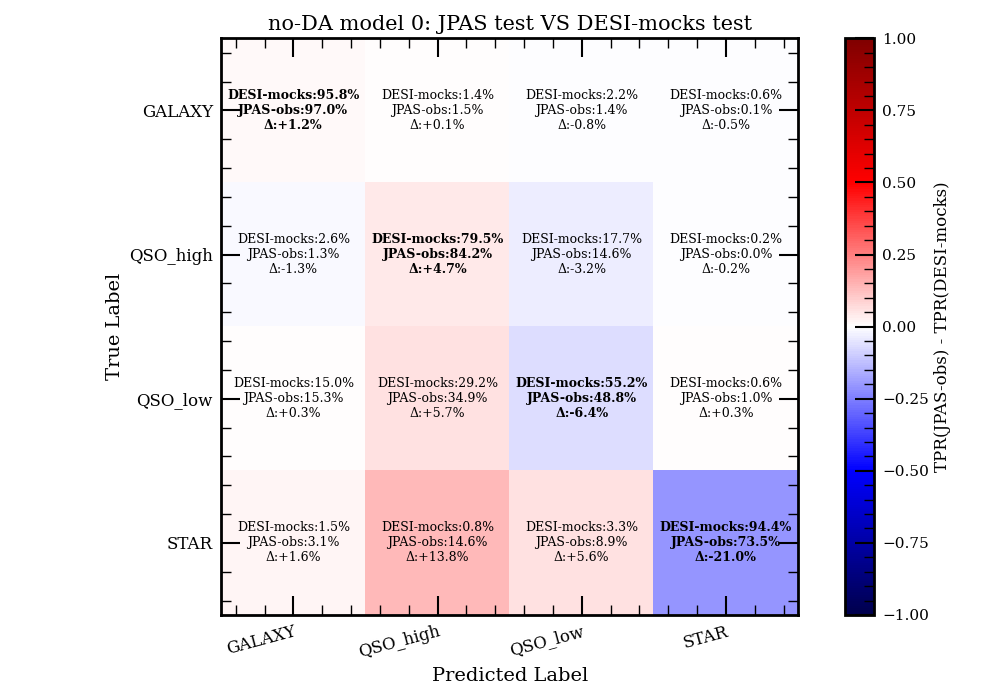


=== DESI-mocks vs JPAS-obs Metrics ===
Metric                          DESI-mocks    JPAS-obsΔ (JPAS-obs - DESI-mocks)
-------------------------------------------------------------------------------
Accuracy                            0.9309      0.8771           -0.0539
Macro F1                            0.7398      0.6381           -0.1017
Macro TPR                           0.8123      0.7586           -0.0536
Macro Precision                     0.7069      0.6400           -0.0669
Macro AUROC                         0.9379      0.8845           -0.0535
Expected Calibration Error          0.0789      0.0625           -0.0165
Brier Score                         0.1278      0.2170            0.0892


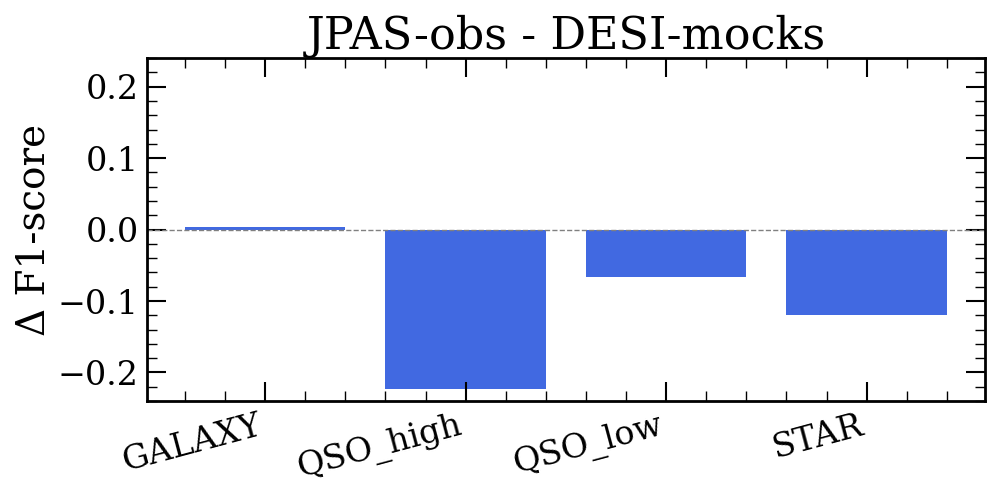

/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/JPAS_DA/evaluation/evaluation_tools.py:485: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


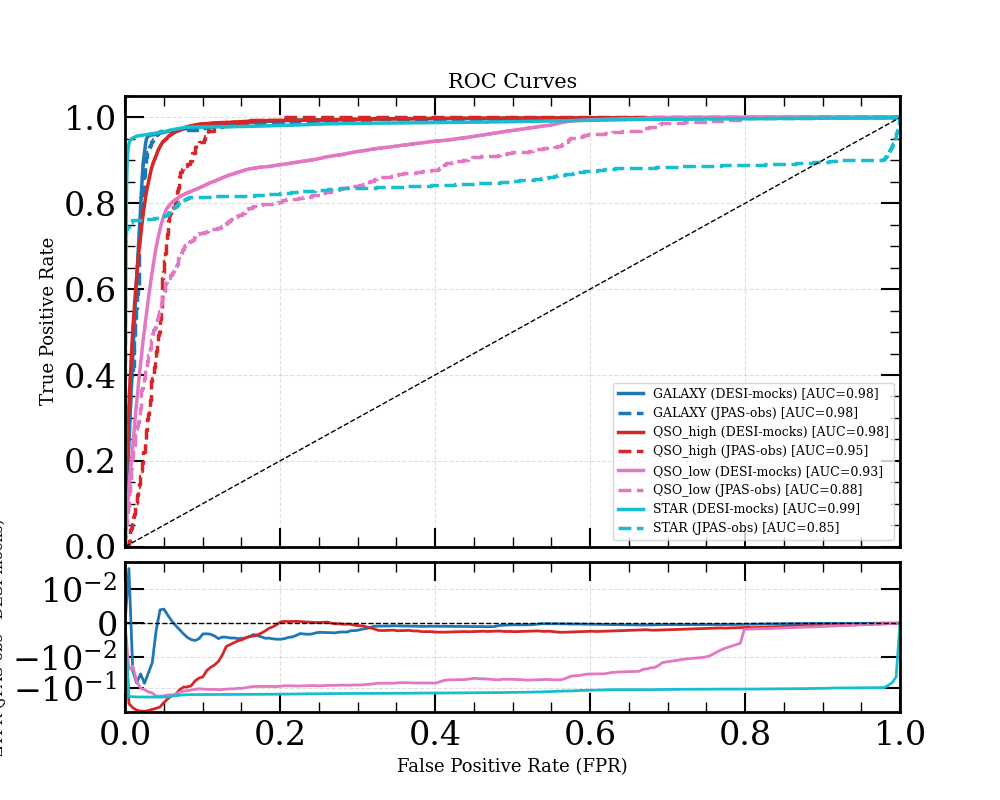

In [22]:
for ii_model, model in enumerate(RESULTS_no_DA):
    evaluation_tools.compare_TPR_confusion_matrices(
        RESULTS_no_DA[ii_model]['val_DESI_only']['true'],
        RESULTS_no_DA[ii_model]['val_DESI_only']['prob'],
        RESULTS_no_DA[ii_model]['test_JPAS_matched']['true'],
        RESULTS_no_DA[ii_model]['test_JPAS_matched']['prob'],
        class_names=class_names,
        figsize=(10, 7),
        cmap='seismic',
        title='no-DA model ' + str(ii_model) + ': JPAS test VS DESI-mocks test',
        name_1 = "DESI-mocks",
        name_2 = "JPAS-obs",
    )

    metrics = evaluation_tools.compare_sets_performance(
        RESULTS_no_DA[ii_model]['val_DESI_only']['true'], RESULTS_no_DA[ii_model]['val_DESI_only']['prob'],
        RESULTS_no_DA[ii_model]['test_JPAS_matched']['true'], RESULTS_no_DA[ii_model]['test_JPAS_matched']['prob'],
        class_names=class_names,
        name_1="DESI-mocks",
        name_2="JPAS-obs"
    )

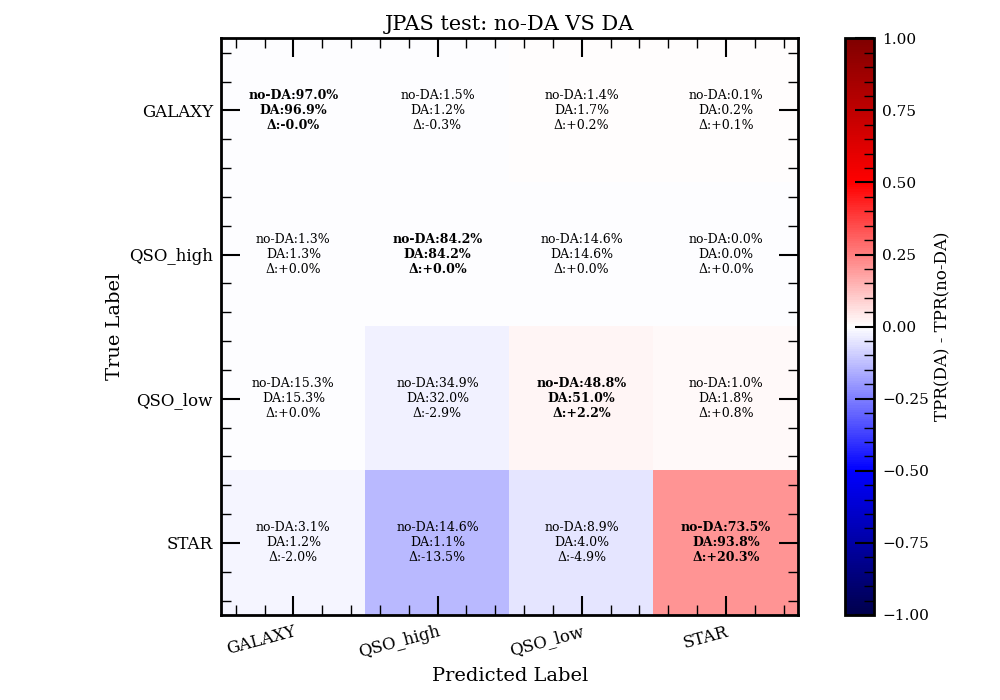


=== no-DA vs DA Metrics ===
Metric                               no-DA          DA    Δ (DA - no-DA)
------------------------------------------------------------------------
Accuracy                            0.8771      0.9339            0.0568
Macro F1                            0.6381      0.7346            0.0965
Macro TPR                           0.7586      0.8148            0.0561
Macro Precision                     0.6400      0.7097            0.0696
Macro AUROC                         0.8845      0.9369            0.0525
Expected Calibration Error          0.0625      0.0831            0.0207
Brier Score                         0.2170      0.1244           -0.0926


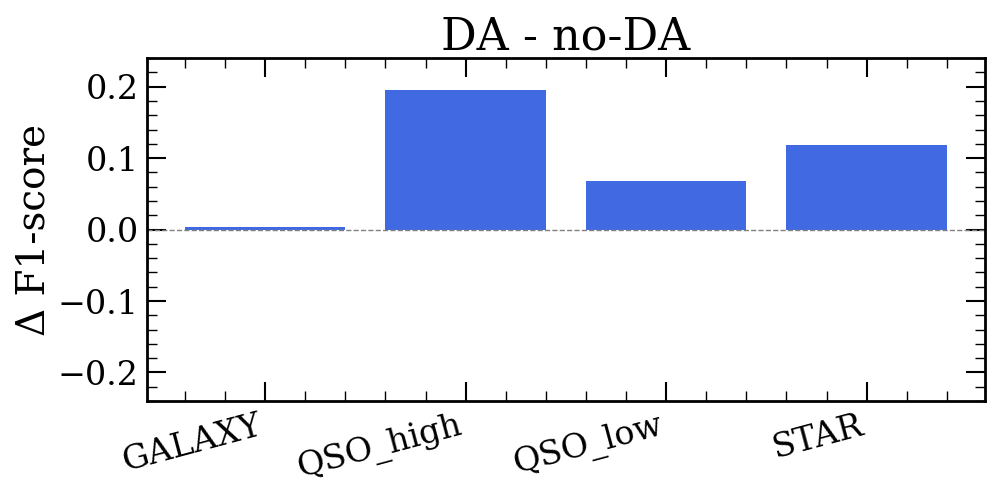

/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/JPAS_DA/evaluation/evaluation_tools.py:485: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


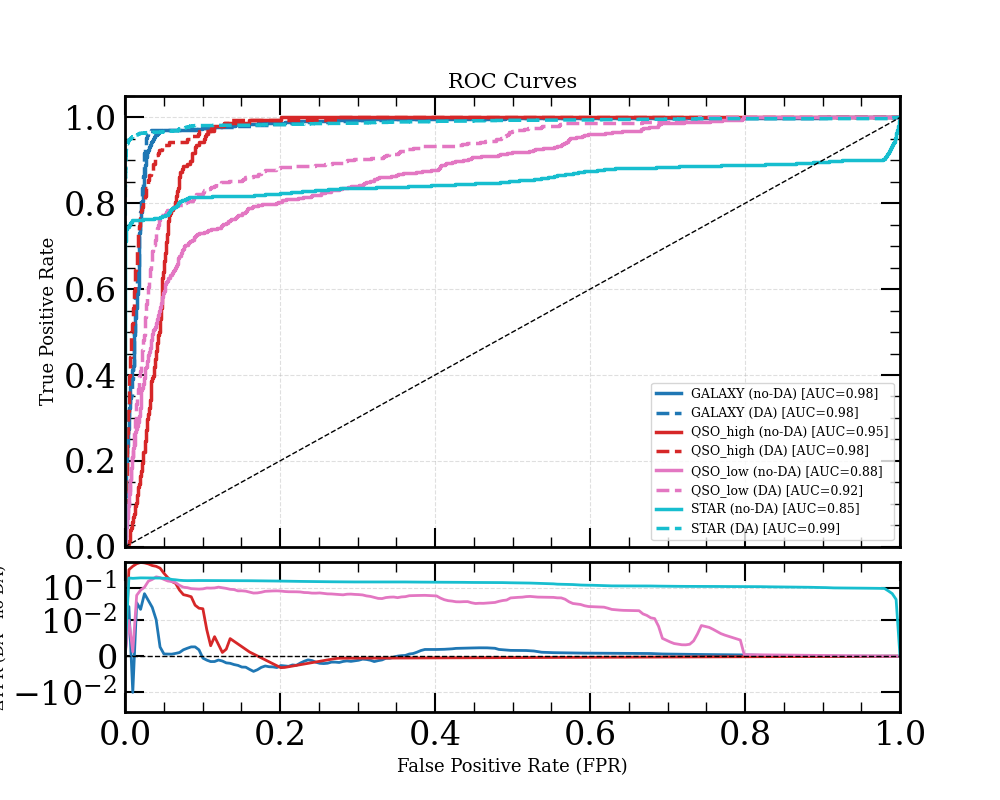

In [23]:
ii_model = 0

evaluation_tools.compare_TPR_confusion_matrices(
    RESULTS_no_DA[ii_model]['test_JPAS_matched']['true'],
    RESULTS_no_DA[ii_model]['test_JPAS_matched']['prob'],
    RESULTS_DA[ii_model]['test_JPAS_matched']['true'],
    RESULTS_DA[ii_model]['test_JPAS_matched']['prob'],
    class_names=class_names,
    figsize=(10, 7),
    cmap='seismic',
    title='JPAS test: no-DA VS DA',
    name_1 = "no-DA",
    name_2 = "DA",
)

metrics = evaluation_tools.compare_sets_performance(
    RESULTS_no_DA[ii_model]['test_JPAS_matched']['true'], RESULTS_no_DA[ii_model]['test_JPAS_matched']['prob'],
    RESULTS_DA[ii_model]['test_JPAS_matched']['true'], RESULTS_DA[ii_model]['test_JPAS_matched']['prob'],
    class_names=class_names,
    name_1="no-DA",
    name_2="DA"
)

In [24]:
magnitude_key="DESI_FLUX_R"
mag_bin_edges=(17, 19, 21, 22, 22.5)
output_key="MAG_BIN_ID"

magnitude_ranges = [(mag_bin_edges[i], mag_bin_edges[i+1]) for i in range(len(mag_bin_edges)-1)]
colors = ['blue', 'green', 'orange', 'red']
colormaps = [plt.cm.Blues, plt.cm.Greens, plt.cm.YlOrBr, plt.cm.Reds]

In [25]:
RESULTS_no_DA = evaluation_tools.add_magnitude_bins_to_results(
    RESULTS_no_DA, magnitude_key=magnitude_key, mag_bin_edges=mag_bin_edges, output_key=output_key
)

In [26]:
RESULTS_DA = evaluation_tools.add_magnitude_bins_to_results(
    RESULTS_DA, magnitude_key=magnitude_key, mag_bin_edges=mag_bin_edges, output_key=output_key
)

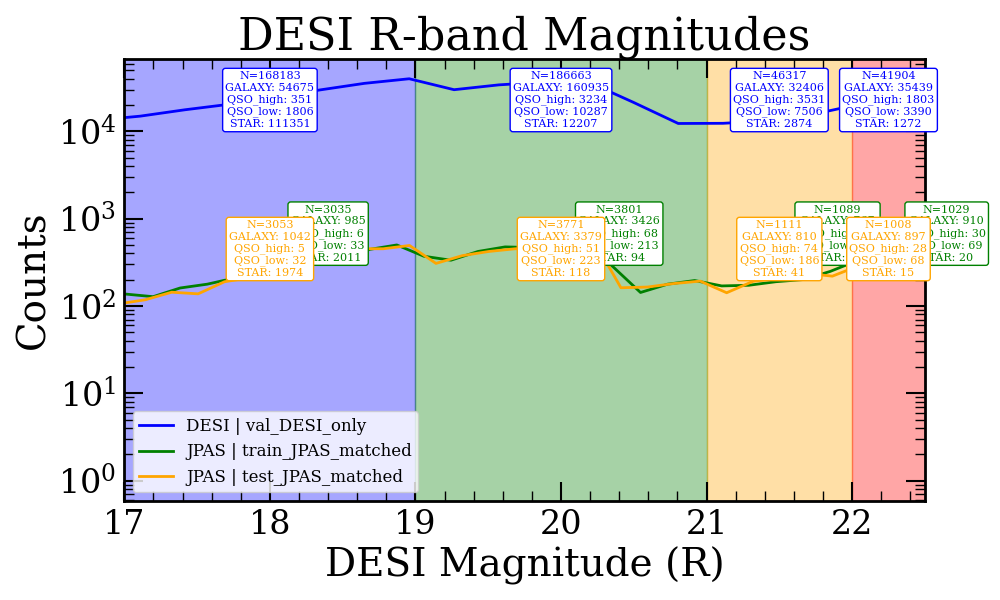

In [27]:
magnitudes_plot = {
    ("DESI", "val_DESI_only"): -2.5 * np.log10(RESULTS_no_DA[ii_model]['val_DESI_only']['DESI_FLUX_R']) + 22.5,
    ("JPAS", "train_JPAS_matched"): -2.5 * np.log10(RESULTS_DA[ii_model]['train_JPAS_matched']['DESI_FLUX_R']) + 22.5,
    ("JPAS", "test_JPAS_matched"): -2.5 * np.log10(RESULTS_DA[ii_model]['test_JPAS_matched']['DESI_FLUX_R']) + 22.5
}

labels_plot = {
    ("DESI", "val_DESI_only"): RESULTS_no_DA[ii_model]['val_DESI_only']['true'],         
    ("JPAS", "train_JPAS_matched"): RESULTS_DA[ii_model]['train_JPAS_matched']['true'], 
    ("JPAS", "test_JPAS_matched"): RESULTS_DA[ii_model]['test_JPAS_matched']['true'],
}

masks_all, stats_all = plotting_utils.plot_histogram_with_ranges_multiple(
    magnitudes_plot,
    ranges=magnitude_ranges,
    colors=colors,
    bins=42,
    x_label="DESI Magnitude (R)",
    title="DESI R-band Magnitudes",
    labels_dict=labels_plot,
    class_names=class_names,
    pct_decimals=0,
    annotate_mode='text',
    legend_fontsize=12
)

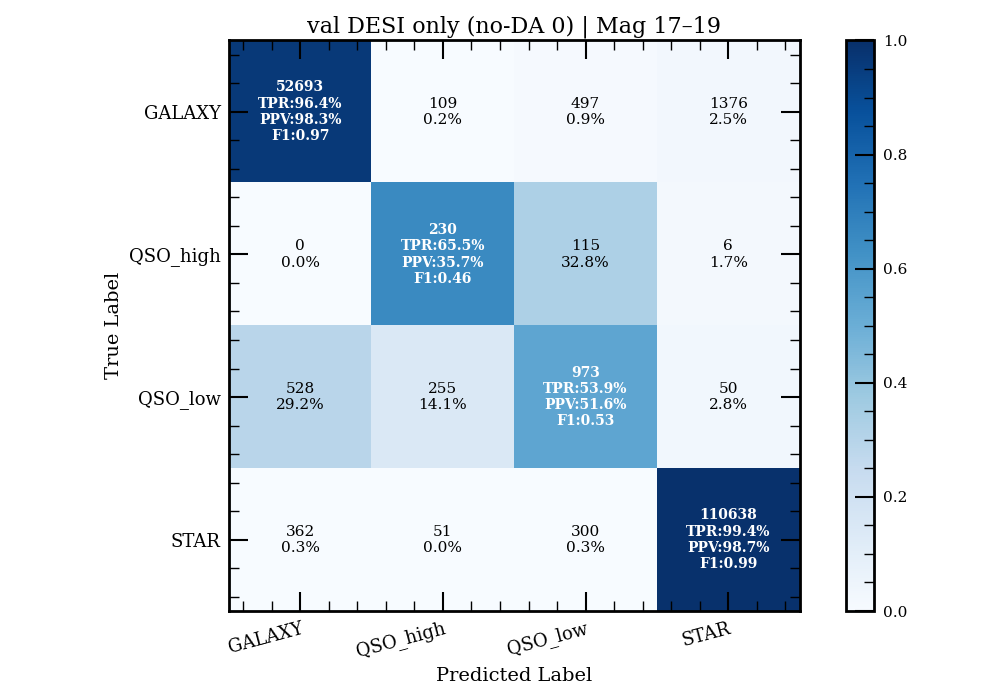

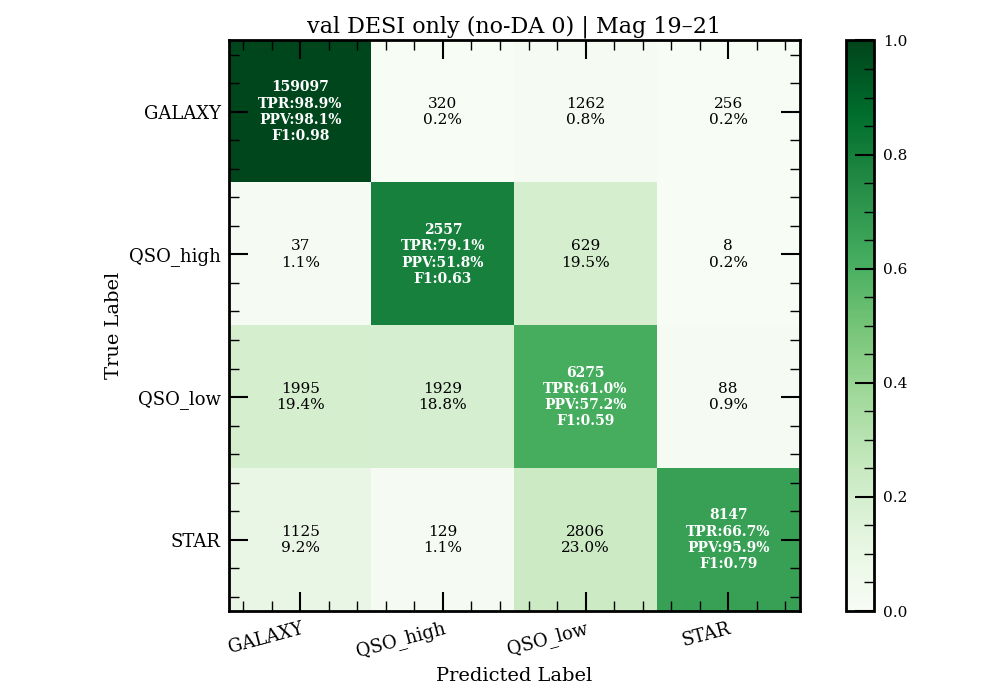

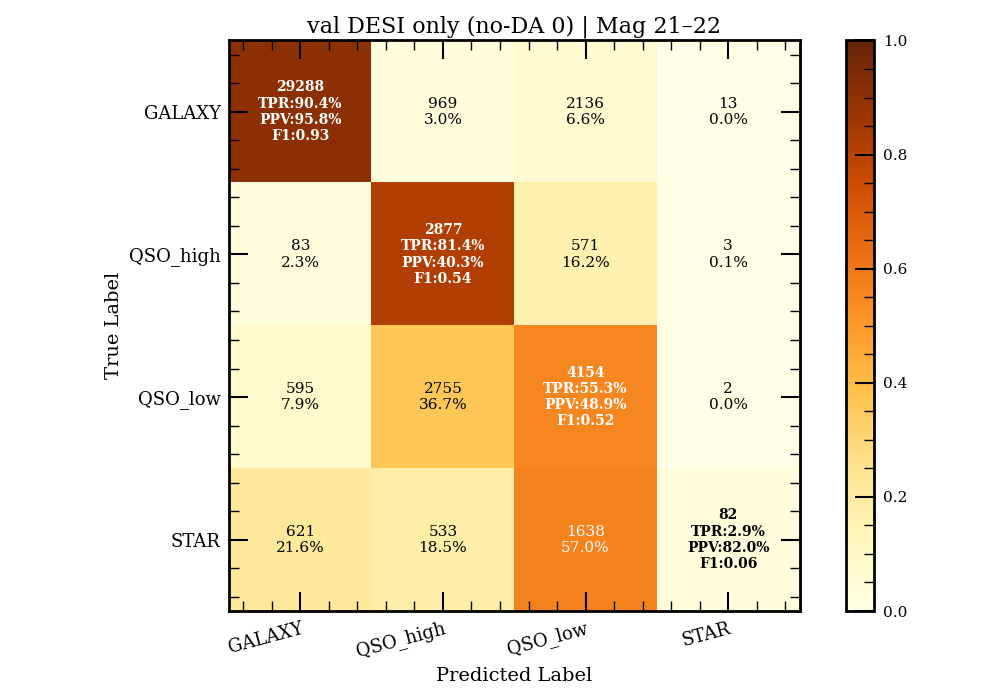

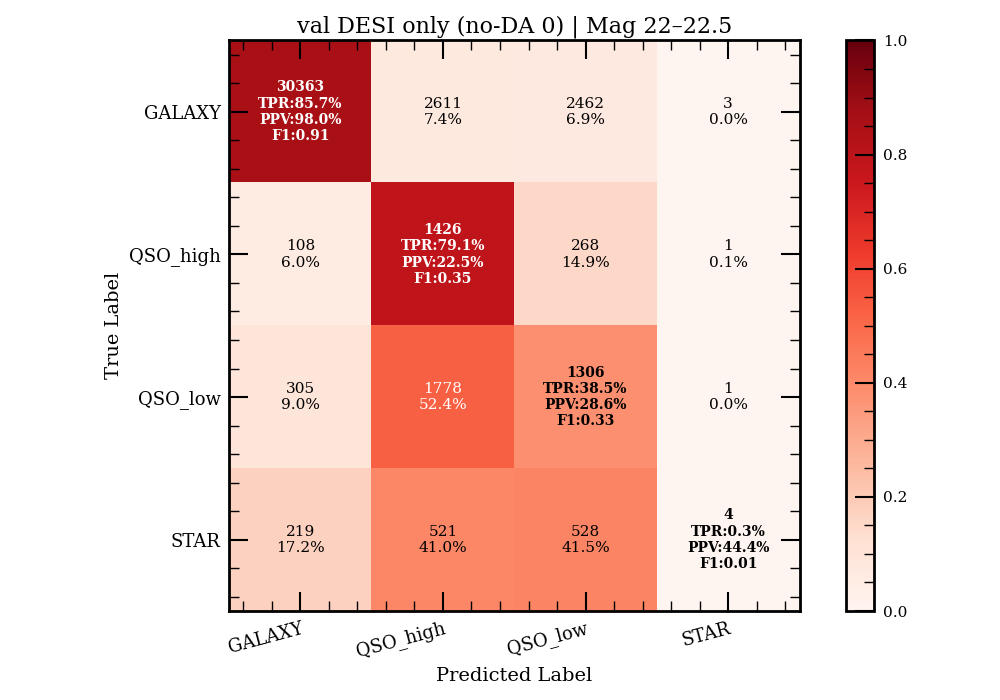

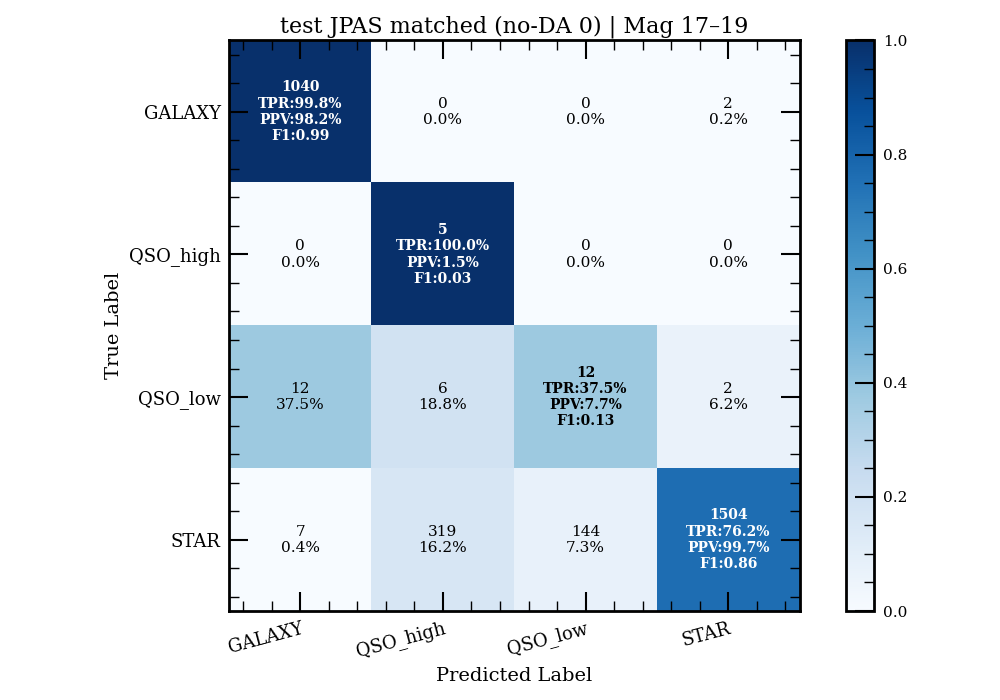

/home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/JPAS_DA/evaluation/evaluation_tools.py:143: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


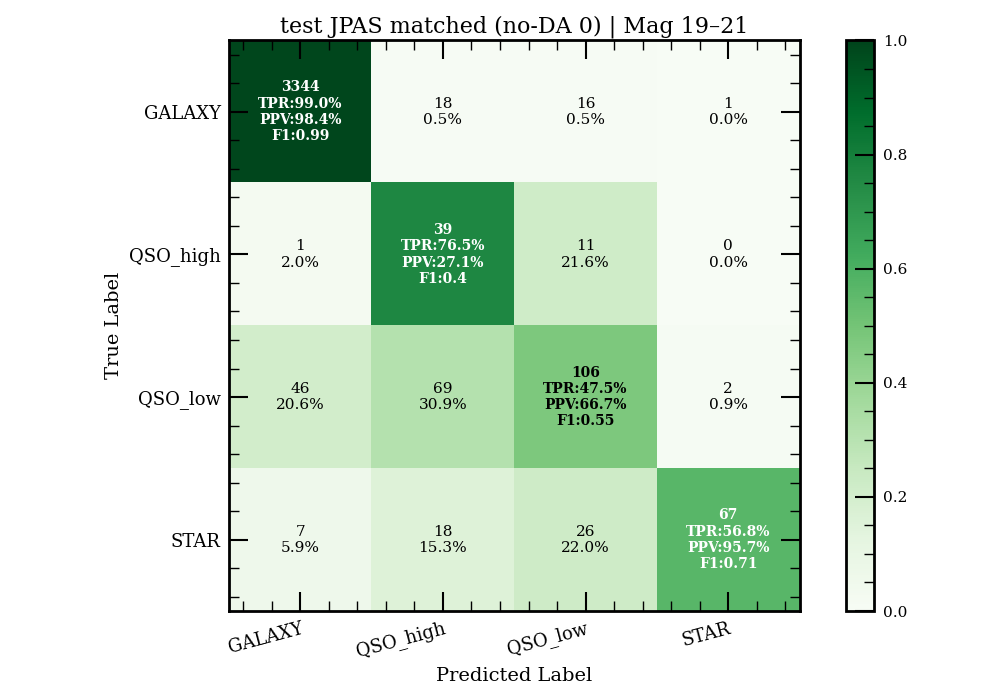

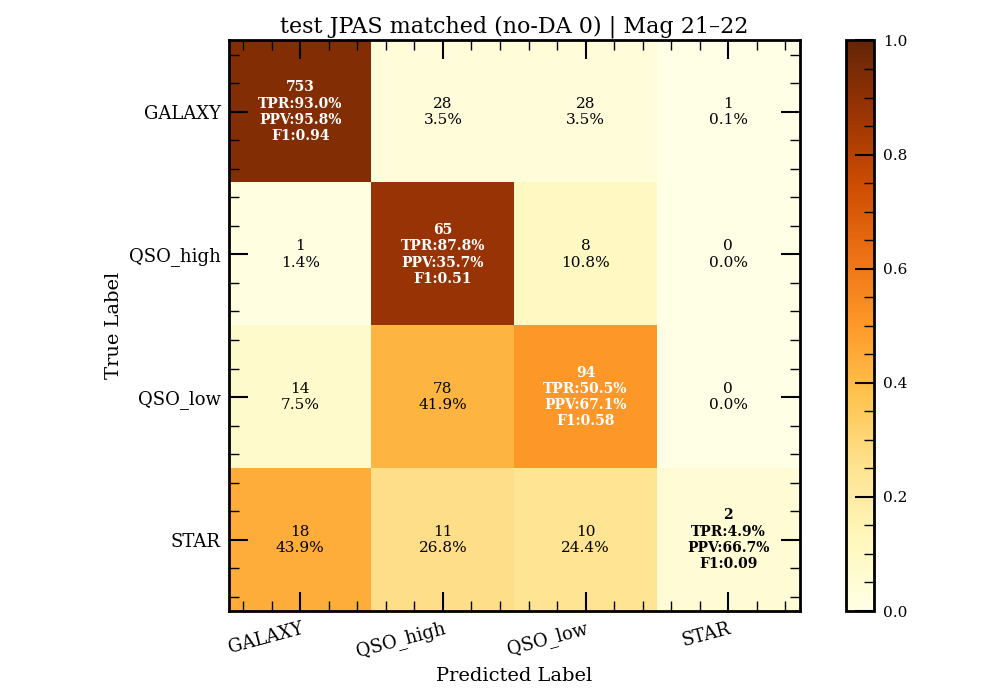

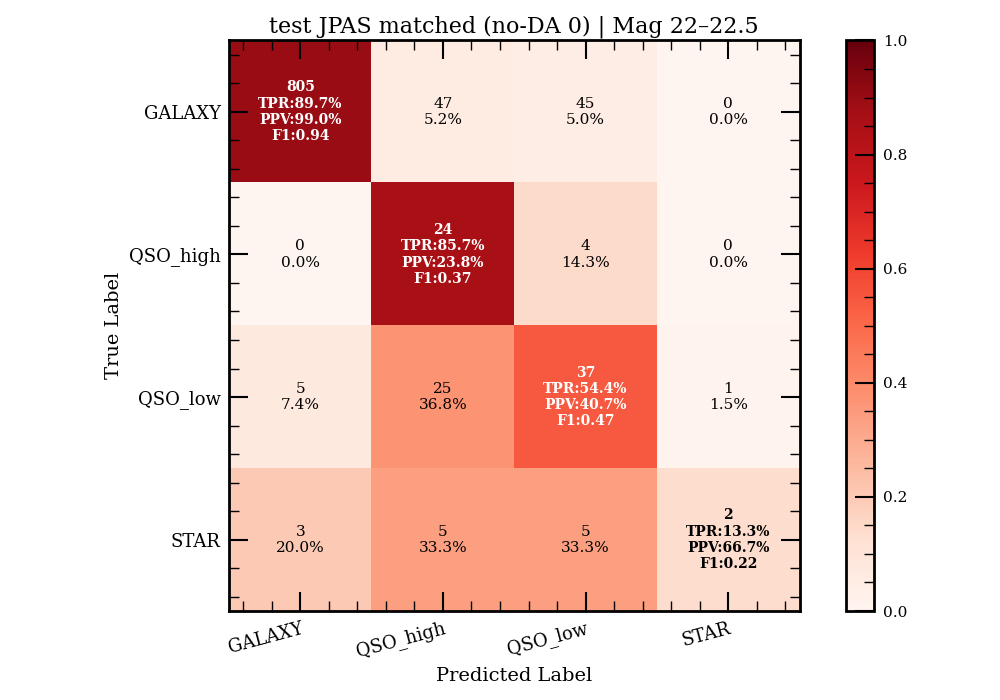

In [28]:
bin_labels = [f"{lo}–{hi}" for lo, hi in magnitude_ranges]
num_bins = len(magnitude_ranges)

# Sweep no-DA models
for model_idx, model_outputs in RESULTS_no_DA.items():
    for key, result in model_outputs.items():
        mag_bins = result["MAG_BIN_ID"]
        yy_true_all = result["true"]
        yy_pred_all = result["prob"]

        for bin_id in range(num_bins):
            mask = mag_bins == bin_id
            if np.sum(mask) == 0:
                continue  # Skip empty bins

            yy_true = yy_true_all[mask]
            yy_pred = yy_pred_all[mask]

            evaluation_tools.plot_confusion_matrix(
                yy_true,
                yy_pred,
                class_names=class_names,
                cmap=colormaps[bin_id],
                title=f"{key.replace('_', ' ')} (no-DA {model_idx}) | Mag {bin_labels[bin_id]}"
            )

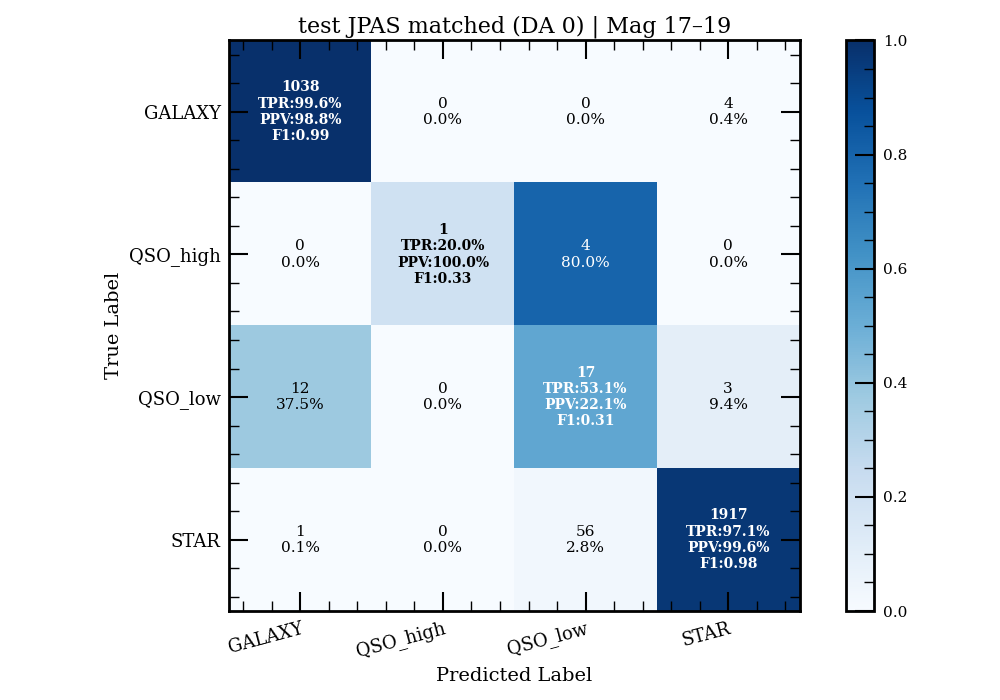

2025-09-10 09:05:30,713 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-09-10 09:05:30,714 - INFO - ├── 🚀 Starting ID categorization process...
2025-09-10 09:05:30,717 - INFO - |    ├── 📌 Found 100787 unique IDs across 2 arrays.
2025-09-10 09:05:30,726 - INFO - |    ├── Presence matrix created with shape: (2, 100787)
2025-09-10 09:05:30,726 - INFO - |    ├── Category mask created with shape: (2, 100787)
2025-09-10 09:05:30,727 - INFO - ├── 🚀 Starting index retrieval process...
2025-09-10 09:05:30,727 - INFO - |    ├── 📌 Processing 100787 unique IDs across 2 arrays.
2025-09-10 09:05:30,761 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-09-10 09:05:30,763 - INFO - |    ├── Processing complete: 0 IDs only in Array 1 (0.0%).
2025-09-10 09:05:30,763 - INFO - |    ├── Processing complete: 97734 IDs only in Array 2 (96.97%).
2025-09-10 09:05:30,763 - INFO - |    ├── Processing complete: 3053 IDs in both arrays (3.03%).
2025-09-10 09:05:30,763 - INFO - ✅ Finis

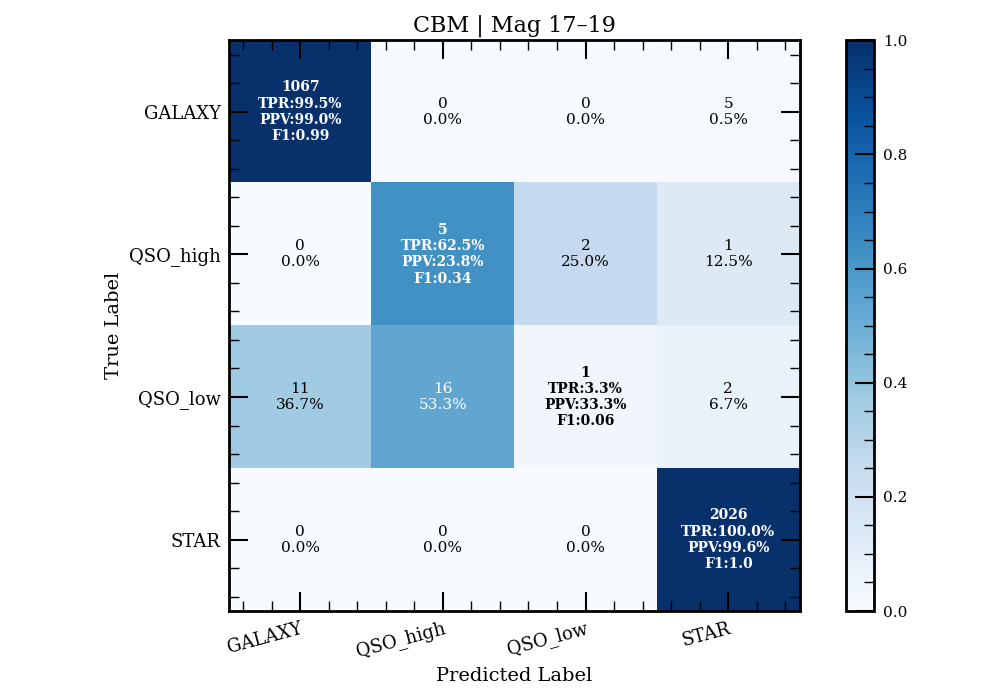

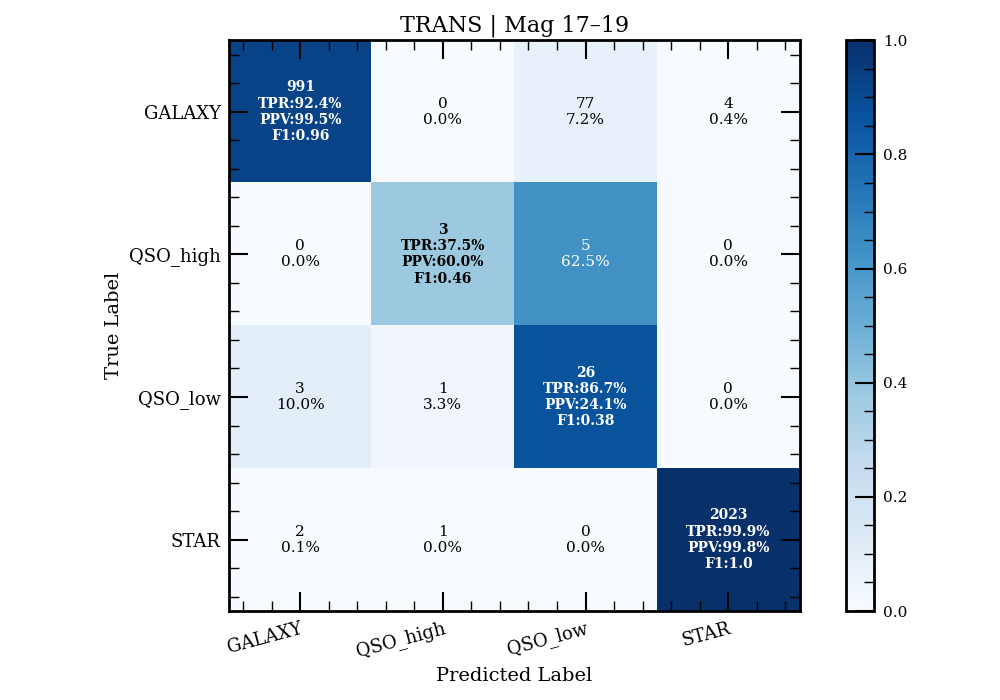

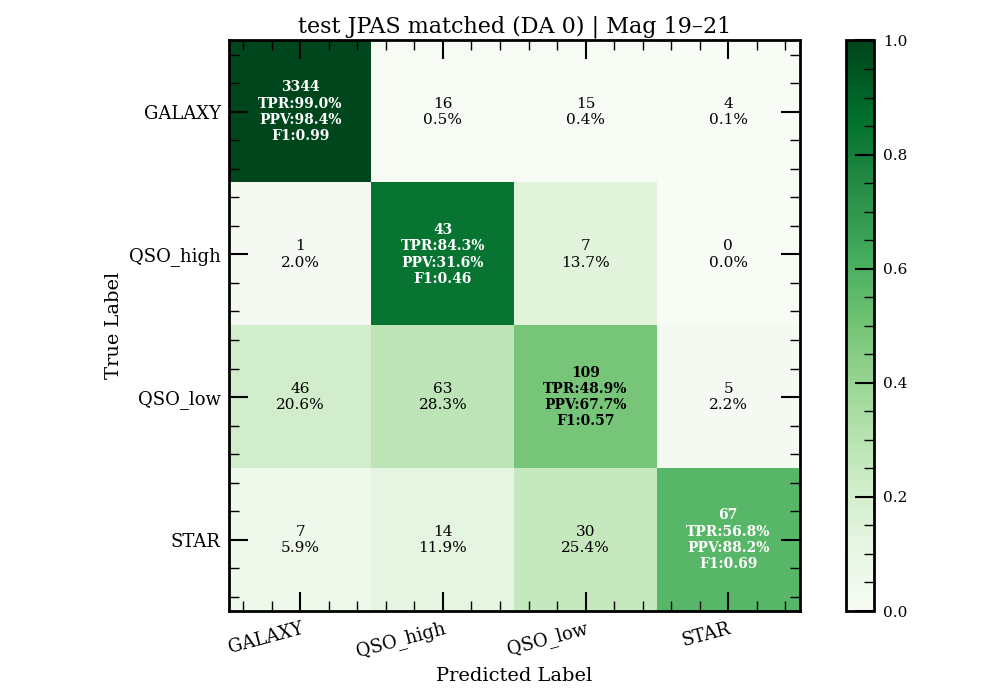

2025-09-10 09:05:31,121 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-09-10 09:05:31,121 - INFO - ├── 🚀 Starting ID categorization process...
2025-09-10 09:05:31,124 - INFO - |    ├── 📌 Found 100787 unique IDs across 2 arrays.
2025-09-10 09:05:31,134 - INFO - |    ├── Presence matrix created with shape: (2, 100787)
2025-09-10 09:05:31,134 - INFO - |    ├── Category mask created with shape: (2, 100787)
2025-09-10 09:05:31,135 - INFO - ├── 🚀 Starting index retrieval process...
2025-09-10 09:05:31,135 - INFO - |    ├── 📌 Processing 100787 unique IDs across 2 arrays.
2025-09-10 09:05:31,169 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-09-10 09:05:31,171 - INFO - |    ├── Processing complete: 0 IDs only in Array 1 (0.0%).
2025-09-10 09:05:31,171 - INFO - |    ├── Processing complete: 97016 IDs only in Array 2 (96.26%).
2025-09-10 09:05:31,171 - INFO - |    ├── Processing complete: 3771 IDs in both arrays (3.74%).
2025-09-10 09:05:31,171 - INFO - ✅ Finis

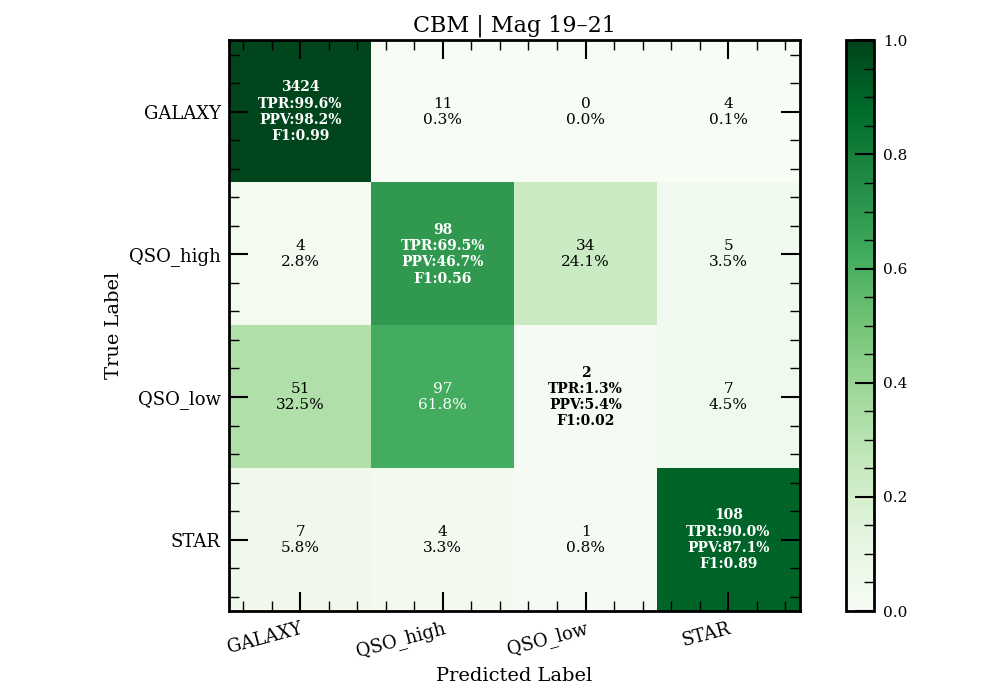

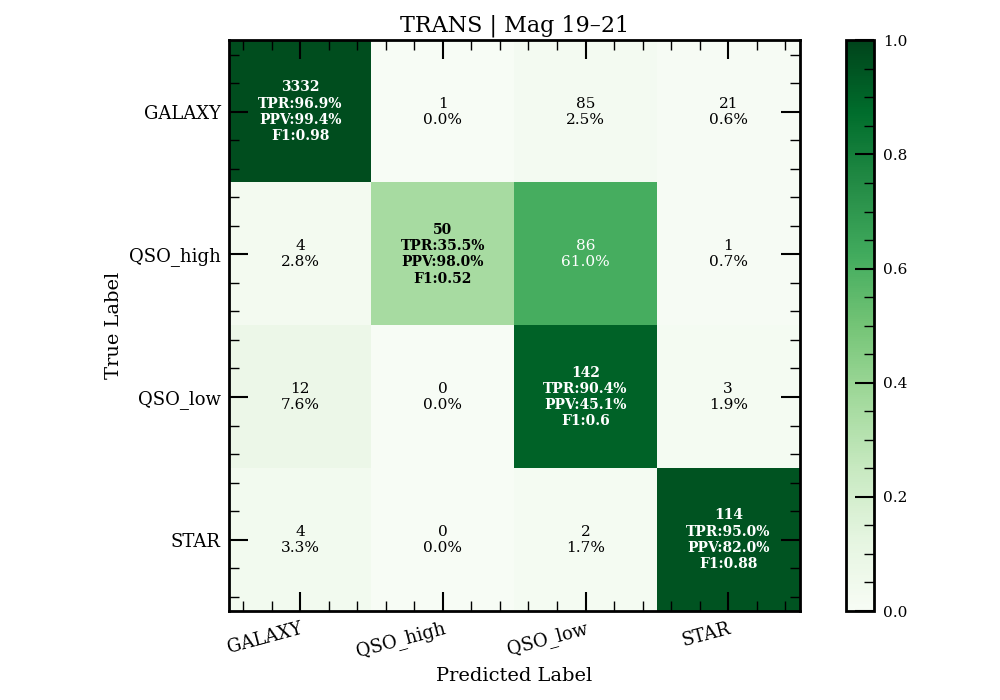

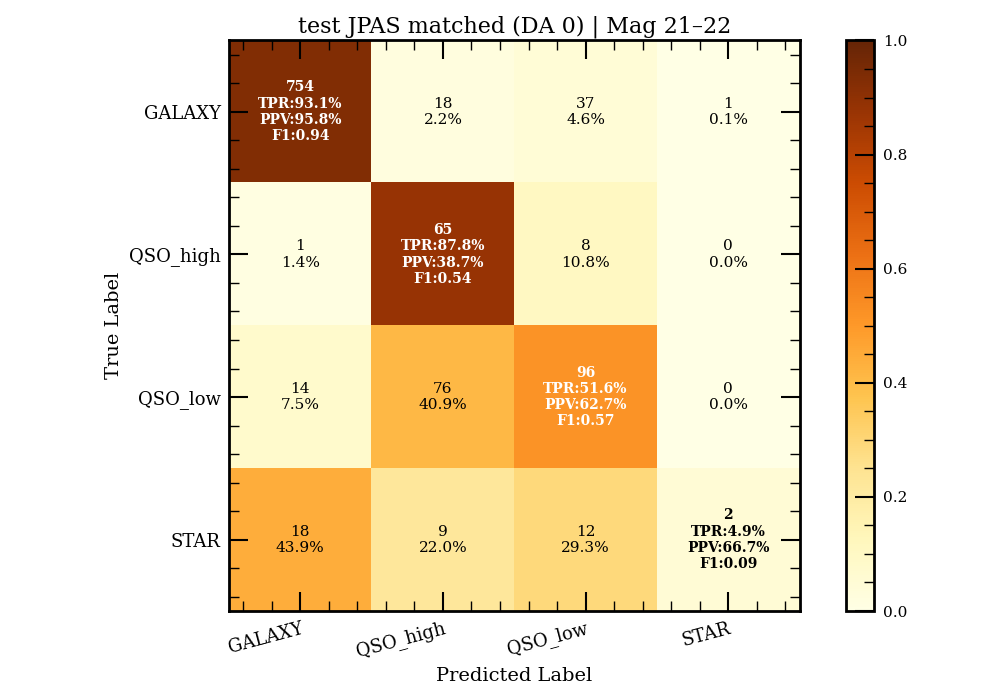

2025-09-10 09:05:31,633 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-09-10 09:05:31,634 - INFO - ├── 🚀 Starting ID categorization process...
2025-09-10 09:05:31,637 - INFO - |    ├── 📌 Found 100787 unique IDs across 2 arrays.
2025-09-10 09:05:31,646 - INFO - |    ├── Presence matrix created with shape: (2, 100787)
2025-09-10 09:05:31,646 - INFO - |    ├── Category mask created with shape: (2, 100787)
2025-09-10 09:05:31,646 - INFO - ├── 🚀 Starting index retrieval process...
2025-09-10 09:05:31,646 - INFO - |    ├── 📌 Processing 100787 unique IDs across 2 arrays.
2025-09-10 09:05:31,680 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-09-10 09:05:31,681 - INFO - |    ├── Processing complete: 0 IDs only in Array 1 (0.0%).
2025-09-10 09:05:31,681 - INFO - |    ├── Processing complete: 99676 IDs only in Array 2 (98.9%).
2025-09-10 09:05:31,681 - INFO - |    ├── Processing complete: 1111 IDs in both arrays (1.1%).
2025-09-10 09:05:31,682 - INFO - ✅ Finishe

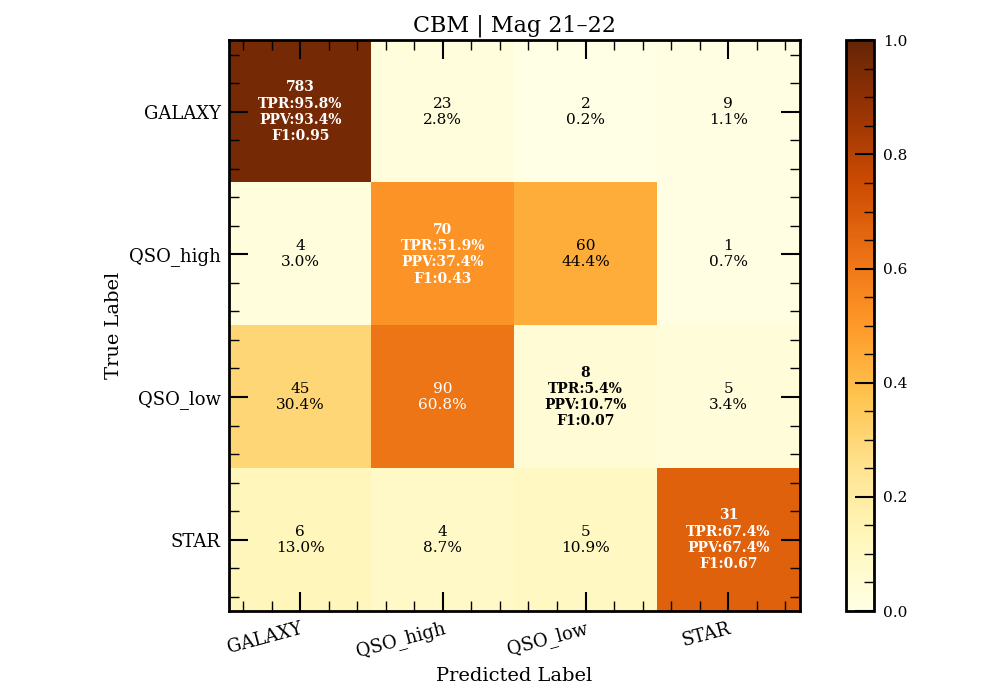

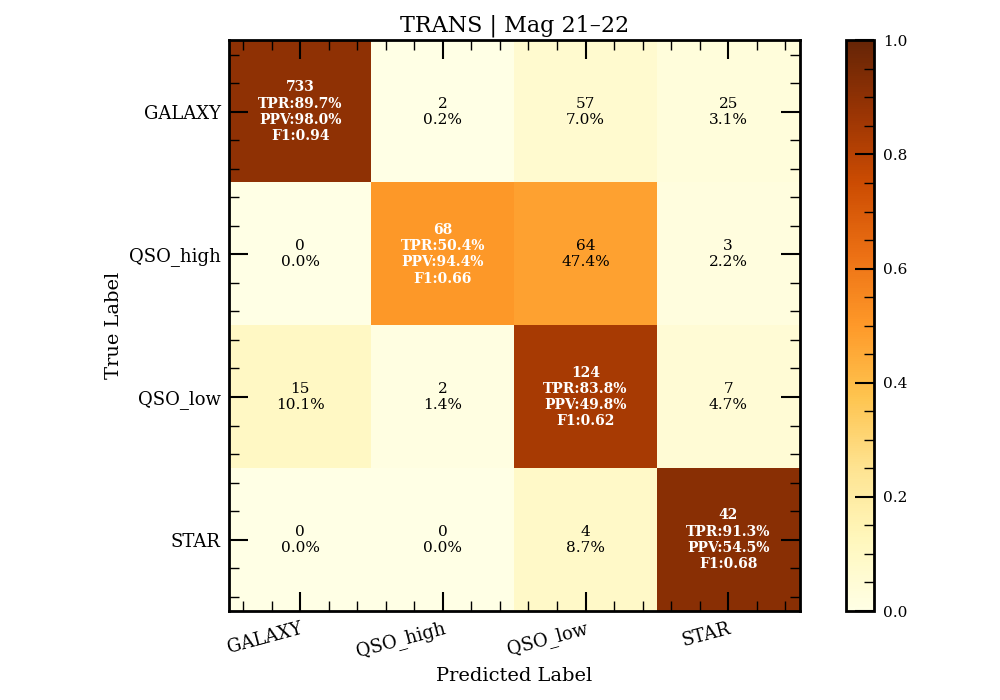

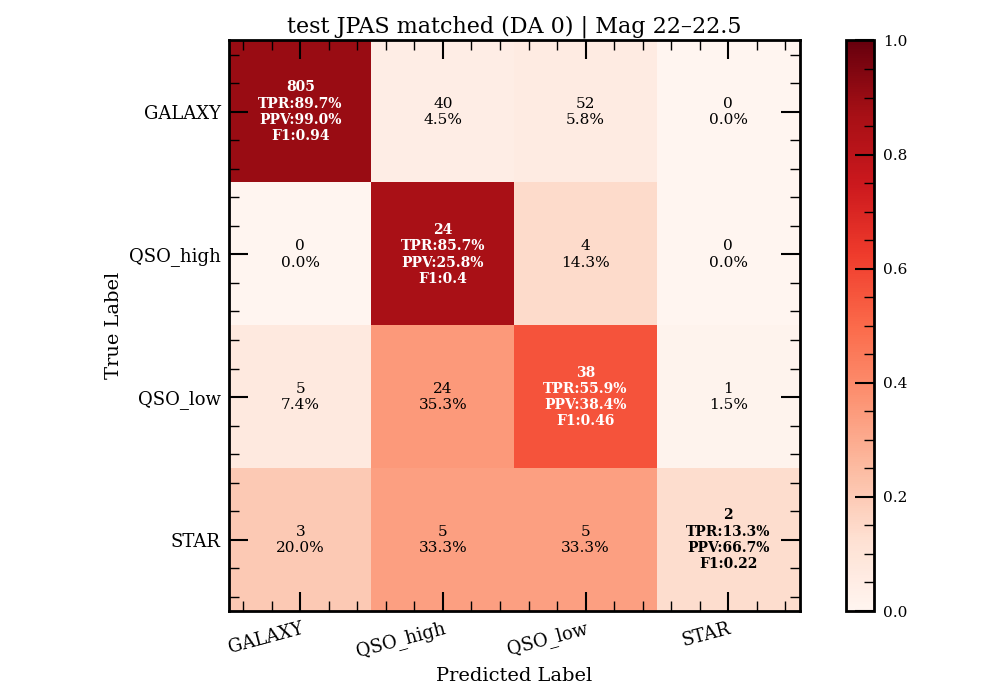

2025-09-10 09:05:32,028 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-09-10 09:05:32,028 - INFO - ├── 🚀 Starting ID categorization process...
2025-09-10 09:05:32,031 - INFO - |    ├── 📌 Found 100787 unique IDs across 2 arrays.
2025-09-10 09:05:32,041 - INFO - |    ├── Presence matrix created with shape: (2, 100787)
2025-09-10 09:05:32,041 - INFO - |    ├── Category mask created with shape: (2, 100787)
2025-09-10 09:05:32,041 - INFO - ├── 🚀 Starting index retrieval process...
2025-09-10 09:05:32,041 - INFO - |    ├── 📌 Processing 100787 unique IDs across 2 arrays.
2025-09-10 09:05:32,075 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-09-10 09:05:32,077 - INFO - |    ├── Processing complete: 0 IDs only in Array 1 (0.0%).
2025-09-10 09:05:32,077 - INFO - |    ├── Processing complete: 99779 IDs only in Array 2 (99.0%).
2025-09-10 09:05:32,077 - INFO - |    ├── Processing complete: 1008 IDs in both arrays (1.0%).
2025-09-10 09:05:32,077 - INFO - ✅ Finishe

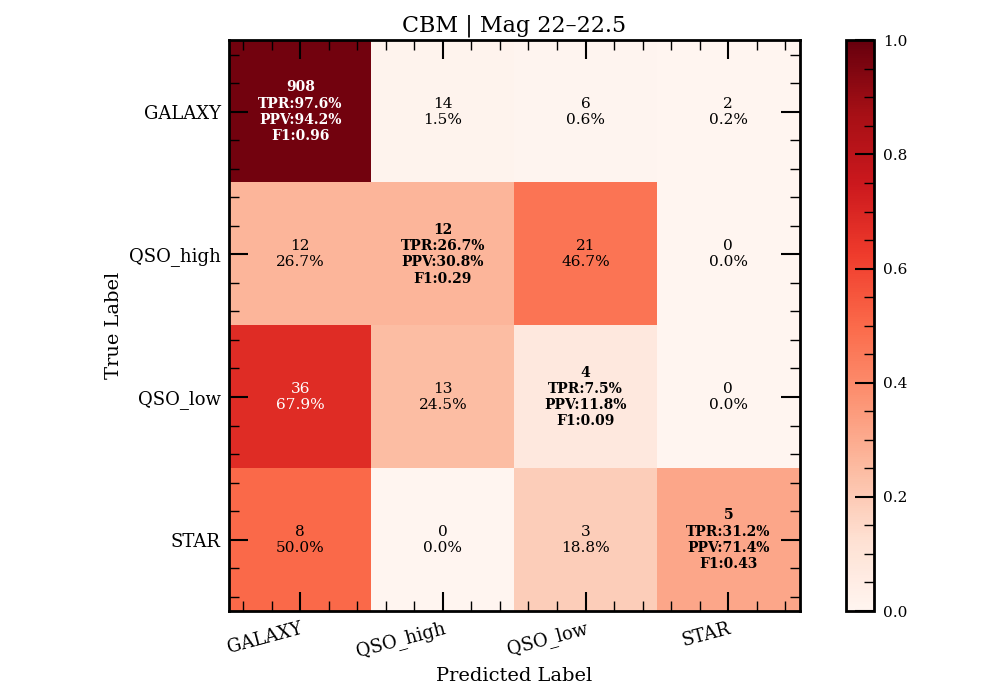

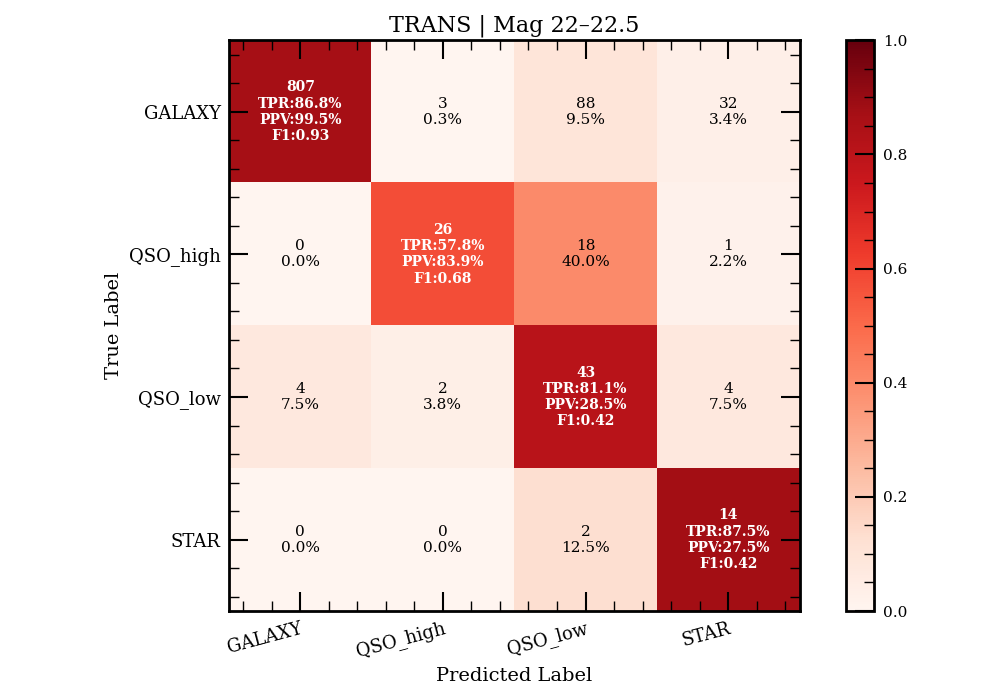

In [29]:
for model_idx in RESULTS_DA.keys():
    model_outputs = RESULTS_DA[model_idx]
    result = model_outputs["test_JPAS_matched"]
    mag_bins = result["MAG_BIN_ID"]
    yy_true_all = result["true"]
    yy_pred_all = result["prob"]
    TARGETIDs = result["TARGETID"]

    for bin_id in range(num_bins):
        mask = mag_bins == bin_id
        if np.sum(mask) == 0:
            continue  # Skip empty bins

        yy_true = yy_true_all[mask]
        yy_pred = yy_pred_all[mask]

        evaluation_tools.plot_confusion_matrix(
            yy_true,
            yy_pred,
            class_names=class_names,
            cmap=colormaps[bin_id],
            title=f"test JPAS matched (DA {model_idx}) | Mag {bin_labels[bin_id]}"
        )

        IDs_only_1, IDs_only_2, IDs_both, idxs_only_1, idxs_only_2, idxs_both_1, idxs_both_2 = crossmatch_tools.crossmatch_IDs_two_datasets(
            TARGETIDs[mask],
            np.array(JPAS_Ignasi["TARGETID"][JPAS_Ignasi["is_in_desi_dr1"]])
        )
        idxs_both_Ignasi = np.concatenate(idxs_both_2)
        yy_true_Ignasi_crossmatch = yy_true_Ignasi[idxs_both_Ignasi]
        yy_pred_P_Ignasi_crossmatch_CBM = yy_pred_P["CBM"][idxs_both_Ignasi]
        yy_pred_P_Ignasi_crossmatch_TRANS = yy_pred_P["TRANS"][idxs_both_Ignasi]

        evaluation_tools.plot_confusion_matrix(
            yy_true_Ignasi_crossmatch,
            yy_pred_P_Ignasi_crossmatch_CBM,
            class_names=class_names,
            cmap=colormaps[bin_id],
            title=f"CBM | Mag {bin_labels[bin_id]}"
        )

        evaluation_tools.plot_confusion_matrix(
            yy_true_Ignasi_crossmatch,
            yy_pred_P_Ignasi_crossmatch_TRANS,
            class_names=class_names,
            cmap=colormaps[bin_id],
            title=f"TRANS | Mag {bin_labels[bin_id]}"
        )

2025-09-10 09:05:32,961 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-09-10 09:05:32,962 - INFO - ├── 🚀 Starting ID categorization process...
2025-09-10 09:05:32,965 - INFO - |    ├── 📌 Found 100787 unique IDs across 2 arrays.
2025-09-10 09:05:32,974 - INFO - |    ├── Presence matrix created with shape: (2, 100787)
2025-09-10 09:05:32,974 - INFO - |    ├── Category mask created with shape: (2, 100787)
2025-09-10 09:05:32,974 - INFO - ├── 🚀 Starting index retrieval process...
2025-09-10 09:05:32,974 - INFO - |    ├── 📌 Processing 100787 unique IDs across 2 arrays.
2025-09-10 09:05:33,008 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-09-10 09:05:33,009 - INFO - |    ├── Processing complete: 0 IDs only in Array 1 (0.0%).
2025-09-10 09:05:33,010 - INFO - |    ├── Processing complete: 97734 IDs only in Array 2 (96.97%).
2025-09-10 09:05:33,010 - INFO - |    ├── Processing complete: 3053 IDs in both arrays (3.03%).
2025-09-10 09:05:33,010 - INFO - ✅ Finis

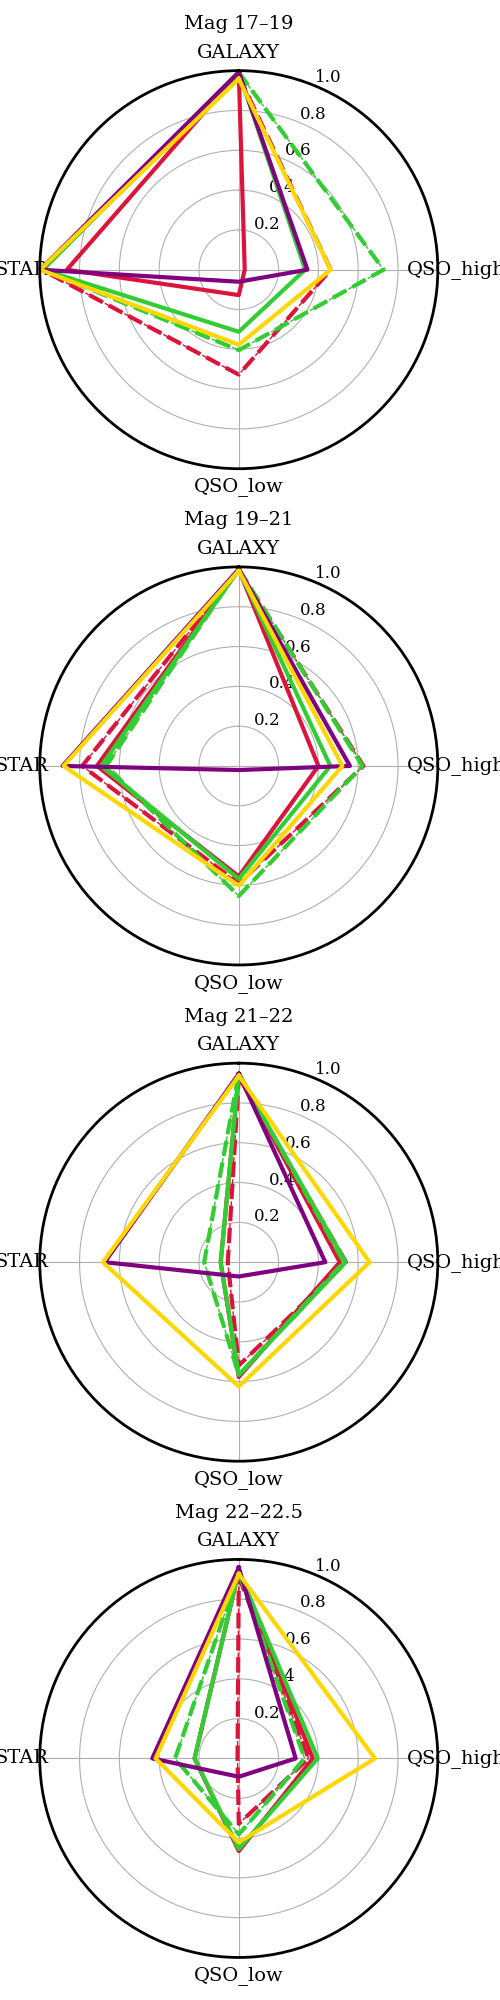

In [30]:
# General config (reused from existing context)
class_count = len(class_names)
angles = np.linspace(0, 2 * np.pi, class_count, endpoint=False).tolist()
angles += angles[:1]
radius_box = 1.05
text_fontsize = 14
linewidth_model = 1
linewidth_mean = 3
tick_labelsize = 14
radial_labelsize = 12
legend_fontsize = 12
title_fontsize = 14
title_pad = 30
num_bins = len(bin_labels)
n_cols = 1
n_rows = int(np.ceil(num_bins / n_cols))
figsize = (n_cols * 5, n_rows * 5)

fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, subplot_kw=dict(polar=True))
axs = axs.flatten()

for bin_id in range(num_bins):
    ax = axs[bin_id]
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), class_names, fontsize=tick_labelsize)
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([str(y) for y in [0.2, 0.4, 0.6, 0.8, 1.0]], fontsize=radial_labelsize)
    ax.set_title(f"Mag {bin_labels[bin_id]}", fontsize=title_fontsize, pad=title_pad)

    # Plot configs
    plot_config = [
        {
            'label': 'no-DA (DESI)',
            'results': RESULTS_no_DA,
            'dataset': 'val_DESI_only',
            'color': 'crimson',
            'linestyle': '--'
        },
        {
            'label': 'no-DA (JPAS)',
            'results': RESULTS_no_DA,
            'dataset': 'test_JPAS_matched',
            'color': 'crimson',
            'linestyle': '-'
        },
        {
            'label': 'DA (JPAS)',
            'results': RESULTS_DA,
            'dataset': 'test_JPAS_matched',
            'color': 'limegreen',
            'linestyle': '-'
        },
        {
            'label': 'DA (JPAS train)',
            'results': RESULTS_DA,
            'dataset': 'train_JPAS_matched',
            'color': 'limegreen',
            'linestyle': '--'
        }
    ]

    # Loop over no-DA and DA configs
    for cfg in plot_config:
        f1_scores_all = []
        for model_idx in cfg['results'].keys():
            data = cfg['results'][model_idx][cfg['dataset']]
            mask = data['MAG_BIN_ID'] == bin_id
            if np.sum(mask) == 0:
                continue
            yy_true = data['true'][mask]
            yy_pred = data['label'][mask]
            f1 = f1_score(yy_true, yy_pred, average=None, zero_division=0)
            f1_scores_all.append(f1)
            f1_plot = f1.tolist() + [f1[0]]
            ax.plot(angles, f1_plot, color=cfg['color'], linestyle=cfg['linestyle'], linewidth=linewidth_model)

        if f1_scores_all:
            f1_mean = np.mean(np.stack(f1_scores_all), axis=0)
            f1_mean_plot = f1_mean.tolist() + [f1_mean[0]]
            ax.plot(angles, f1_mean_plot, color=cfg['color'], linestyle=cfg['linestyle'], linewidth=linewidth_mean)

    # CBM + TRANS crossmatch in this bin
    test_data = RESULTS_DA[0]["test_JPAS_matched"]
    mask_test = test_data["MAG_BIN_ID"] == bin_id
    TARGETIDs = test_data["TARGETID"][mask_test]
    if np.sum(mask_test) > 0:
        yy_true_bin = test_data["true"][mask_test]

        IDs_only_1, IDs_only_2, IDs_both, idxs_only_1, idxs_only_2, idxs_both_1, idxs_both_2 = crossmatch_tools.crossmatch_IDs_two_datasets(
            TARGETIDs, np.array(JPAS_Ignasi["TARGETID"][JPAS_Ignasi["is_in_desi_dr1"]])
        )
        idxs_both_Ignasi = np.concatenate(idxs_both_2)
        if len(idxs_both_Ignasi) > 0:
            yy_true_Ignasi_bin = yy_true_Ignasi[idxs_both_Ignasi]
            f1_cbm = f1_score(yy_true_Ignasi_bin, np.argmax(yy_pred_P["CBM"][idxs_both_Ignasi], axis=1), average=None, zero_division=0)
            f1_trans = f1_score(yy_true_Ignasi_bin, np.argmax(yy_pred_P["TRANS"][idxs_both_Ignasi], axis=1), average=None, zero_division=0)
            f1_cbm_plot = f1_cbm.tolist() + [f1_cbm[0]]
            f1_trans_plot = f1_trans.tolist() + [f1_trans[0]]
            ax.plot(angles, f1_cbm_plot, color='purple', linestyle='-', linewidth=linewidth_mean)
            ax.plot(angles, f1_trans_plot, color='gold', linestyle='-', linewidth=linewidth_mean)

# Remove empty subplots
for i in range(num_bins, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()


In [31]:
paths_load = paths_load_DA

In [32]:
path = paths_load[0]
_, model_encoder = save_load_tools.load_model_from_checkpoint(
    os.path.join(path, "model_encoder.pt"), model_building_tools.create_mlp)
_, model_downstream = save_load_tools.load_model_from_checkpoint(
    os.path.join(path, "model_downstream.pt"), model_building_tools.create_mlp)

In [33]:
# ─────────────────────────────────────────────────────────────
# Load and validate data config across all paths
# ─────────────────────────────────────────────────────────────
logging.info("🔍 Validating model configs...")
configs = []
for path in paths_load:
    _, config = wrapper_tools.load_and_massage_config_file(
        os.path.join(path, "config.yaml"), path
    )
    configs.append(config)

config_ref = configs[0]
for i, cfg in enumerate(configs[1:], 1):
    logging.debug(f"🔍 Comparing config 0 and config {i}")
    if not cleaning_tools.safe_compare(cfg['data'], config_ref['data']):
        raise ValueError(f"🚫 Data config mismatch between model 0 and model {i}")

config_data = config_ref["data"]
keys_xx = config_data["features_labels_options"]["keys_xx"]
keys_yy = config_data["features_labels_options"]["keys_yy"]

# Extract paths and options
path_save = config_ref['training']['path_save']
means, stds = save_load_tools.load_means_stds(path_save)

data_paths = config_data["data_paths"]
root_path = data_paths["root_path"]
load_JPAS_data = data_paths["load_JPAS_data"]
load_DESI_data = data_paths["load_DESI_data"]
random_seed_load = data_paths["random_seed_load"]

clean_opts = config_data["dict_clean_data_options"]
split_opts = config_data["dict_split_data_options"]

2025-09-10 09:05:39,842 - INFO - 🔍 Validating model configs...
2025-09-10 09:05:39,843 - INFO - 🔍 Checking for config file at: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_DA_latent_2/my-sweep-0/config.yaml
2025-09-10 09:05:39,845 - INFO - ✅ Successfully loaded config file: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_DA_latent_2/my-sweep-0/config.yaml
2025-09-10 09:05:39,845 - INFO - 📥 Loading means from: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2/my-sweep-0/means.npy
2025-09-10 09:05:39,845 - INFO - 📥 Loading stds from: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/wandb_no_DA_latent_2/my-sweep-0/stds.npy
2025-09-10 09:05:39,846 - INFO - 📥 Loading means from: /home/dlopez/Documentos/0.profesional/Postdoc/USP/Projects/JPAS_Domain_Adaptation/SAVED_models/w

In [34]:
print(config_data['features_labels_options'].keys())
print(config_data['features_labels_options']['keys_xx'])

loader = 'JPAS'

dict_keys(['define_dataset_loaders_keys', 'keys_xx', 'keys_yy', 'normalize', 'normalization_source_key', 'key_survey_training'])
['OBS', 'MORPHTYPE_int']


In [35]:
# ─────────────────────────────────────────────────────────────
# Load and preprocess shared data
# ─────────────────────────────────────────────────────────────
logging.info("\n\n1️⃣: Loading datasets from disk...")
DATA = loading_tools.load_dsets(root_path, load_JPAS_data, load_DESI_data, random_seed_load)

logging.info("\n\n2️⃣: Cleaning and masking data...")
DATA = cleaning_tools.clean_and_mask_data(DATA=DATA, **clean_opts)

logging.info("\n\n5️⃣: Load and normalize data...")
xx = {}
for key in keys_xx:
    xx[key] = DATA[loader][key]

yy = {}
for key in keys_yy:
    yy[key] = DATA[loader][key]

stacked_features = []
for i, k in enumerate(xx):
    arr = np.asarray(xx[k])
    if arr.size == 0:
        continue
    normed = (arr - means[i]) / stds[i]
    stacked_features.append(np.atleast_2d(normed).reshape(arr.shape[0], -1))

if stacked_features:
    xx_stacked = np.concatenate(stacked_features, axis=1)
else:
    xx_stacked = np.empty((0, sum([np.prod(np.shape(xx[k])[1:]) for k in keys_xx])))

xx = torch.tensor(xx_stacked, dtype=torch.float32)

2025-09-10 09:05:40,147 - INFO - 

1️⃣: Loading datasets from disk...
2025-09-10 09:05:40,148 - INFO - 📥 Starting full dataset loading with `load_dsets()`
2025-09-10 09:05:40,148 - INFO - ├ Loading JPAS datasets...
2025-09-10 09:05:40,148 - INFO - ├─── 📥 Starting JPAS dataset loading...
2025-09-10 09:05:40,148 - INFO - |    ├─── 🔹 Dataset: all (sample 100%)
2025-09-10 09:05:40,189 - INFO - |    |    ✔ CSV loaded: JPAS_DATA_PROPERTIES.csv (shape: (52020, 18))
2025-09-10 09:05:40,199 - INFO - |    |    ✔ NPY loaded: JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy (obs shape: (52020, 57))
2025-09-10 09:05:40,200 - INFO - |    |    ✔ Pickle merged: JPAS_DATA_PROPERTIES_AUX.pkl (keys: ['mask_in_Ignasi', 'mask_dense_if_matched'])
2025-09-10 09:05:40,200 - INFO - ├─── ✅ Finished loading all JPAS datasets.
2025-09-10 09:05:40,200 - INFO - ├ Loading DESI datasets (splitted)...
2025-09-10 09:05:40,200 - INFO - ├─── 📥 Starting DESI dataset loading...
2025-09-10 09:05:40,201 - INFO - |    ├─── 🔹 Dataset: trai

In [36]:
with torch.no_grad():
    features = model_encoder(xx)
    logits = model_downstream(features)
    probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

In [37]:
print(yy['SPECTYPE_int'].shape)
print(xx.shape)
print(features.shape)
print(logits.shape)
print(probs.shape)

(23641,)
torch.Size([23641, 56])
torch.Size([23641, 2])
torch.Size([23641, 4])
(23641, 4)


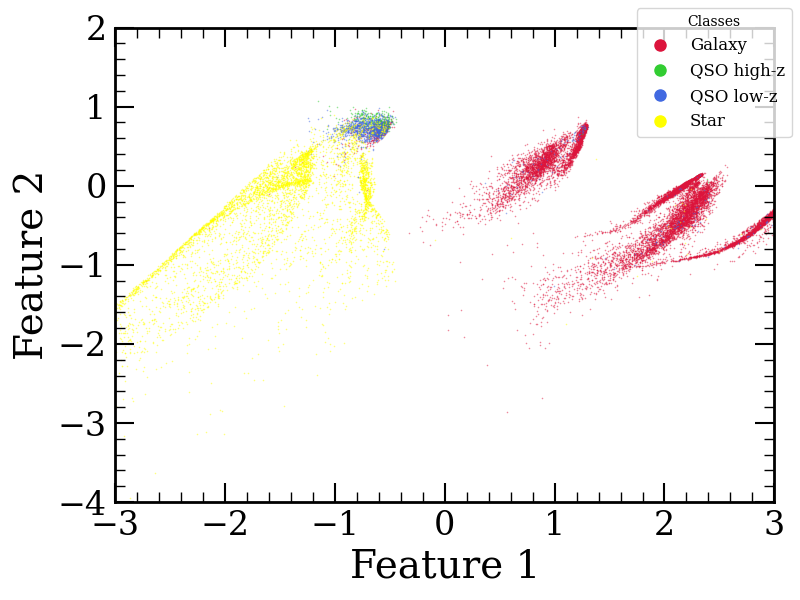

In [38]:
# ------- Colors and class names -------
class_colors = {0: 'crimson', 1: 'limegreen', 2: 'royalblue', 3: 'yellow'}
class_names = {0: 'Galaxy', 1: 'QSO high-z', 2: 'QSO low-z', 3: 'Star'}
alpha = 0.5

# ------- Utility function to scale point size -------
def compute_point_size(n_points, min_size=1, max_size=100, ref_points=30000):
    """Scale point size inversely with dataset size."""
    default_size = ref_points / n_points
    return max(min_size, min(max_size, default_size))

# ------- Utility plotting functions -------
def scatter_by_class(ax, features, y, colors, point_size):
    for cls in np.unique(y):
        mask = y == cls
        ax.scatter(features[mask, 0], features[mask, 1],
                   s=point_size, c=colors[cls], alpha=alpha, linewidths=0)

def scatter_by_prob(ax, features, prob, cls_idx, point_size):
    ax.scatter(features[:, 0], features[:, 1],
               s=point_size, c=prob[:, cls_idx],
               cmap='bwr', vmin=0.0, vmax=1.0, alpha=alpha, linewidths=0)

# ----- Global axis limits -----
x_min, x_max = -3., 3.
y_min, y_max = -4., 2.

# ------- Plotting -------
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Compute point size per dataset
ps = compute_point_size(len(features))
scatter_by_class(ax, features, yy['SPECTYPE_int'], class_colors, ps)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# Legend for classes
class_lines = [mpl.lines.Line2D([0], [0], color=class_colors[k], marker='o',
                                linestyle='', markersize=8, label=class_names[k])
               for k in sorted(class_names.keys())]
fig.legend(class_lines, [class_names[k] for k in sorted(class_names.keys())],
           loc='upper right', title="Classes", fontsize=12)

plt.tight_layout()
plt.show()

In [39]:
root_path = global_setup.DATA_path
load_JPAS_data = global_setup.load_JPAS_data
load_DESI_data = global_setup.load_DESI_data

random_seed_load = global_setup.default_seed

dict_clean_data_options = global_setup.dict_clean_data_options

apply_masks=dict_clean_data_options["apply_masks"]
mask_indices=dict_clean_data_options["mask_indices"]
magic_numbers=dict_clean_data_options["magic_numbers"]
i_band_sn_threshold=dict_clean_data_options["i_band_sn_threshold"]
z_lim_QSO_cut=dict_clean_data_options["z_lim_QSO_cut"]
magnitude_flux_key = dict_clean_data_options["magnitude_flux_key"]
magnitude_threshold = dict_clean_data_options["magnitude_threshold"]

In [40]:
DATA = loading_tools.load_dsets(
    root_path=root_path,
    datasets_jpas=load_JPAS_data,
    datasets_desi=load_DESI_data,
    random_seed=random_seed_load
)

DATA_clean = cleaning_tools.clean_and_mask_data(
    DATA=DATA,
    apply_masks=dict_clean_data_options["apply_masks"],
    mask_indices=dict_clean_data_options["mask_indices"],
    magic_numbers=dict_clean_data_options["magic_numbers"],
    i_band_sn_threshold=dict_clean_data_options["i_band_sn_threshold"],
    magnitude_flux_key=dict_clean_data_options["magnitude_flux_key"],
    magnitude_threshold=dict_clean_data_options["magnitude_threshold"],
    z_lim_QSO_cut=dict_clean_data_options["z_lim_QSO_cut"]
)

2025-09-10 09:06:03,060 - INFO - 📥 Starting full dataset loading with `load_dsets()`
2025-09-10 09:06:03,060 - INFO - ├ Loading JPAS datasets...
2025-09-10 09:06:03,061 - INFO - ├─── 📥 Starting JPAS dataset loading...
2025-09-10 09:06:03,061 - INFO - |    ├─── 🔹 Dataset: all (sample 100%)
2025-09-10 09:06:03,102 - INFO - |    |    ✔ CSV loaded: JPAS_DATA_PROPERTIES.csv (shape: (52020, 18))
2025-09-10 09:06:03,112 - INFO - |    |    ✔ NPY loaded: JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy (obs shape: (52020, 57))
2025-09-10 09:06:03,113 - INFO - |    |    ✔ Pickle merged: JPAS_DATA_PROPERTIES_AUX.pkl (keys: ['mask_in_Ignasi', 'mask_dense_if_matched'])
2025-09-10 09:06:03,114 - INFO - ├─── ✅ Finished loading all JPAS datasets.
2025-09-10 09:06:03,114 - INFO - ├ Loading DESI datasets (splitted)...
2025-09-10 09:06:03,114 - INFO - ├─── 📥 Starting DESI dataset loading...
2025-09-10 09:06:03,115 - INFO - |    ├─── 🔹 Dataset: train
2025-09-10 09:06:06,234 - INFO - |    |    ✔ CSV loaded ((3450643, 1

In [ ]:
DATA_Ignasi = {}
DATA_Ignasi["JPAS"] = loading_tools.fits_struct_to_dict(
    fitsio.read(
        os.path.join(global_setup.DATA_path, global_setup.load_JPAS_data_Ignasi['fits'])
    )
)

DATA_Ignasi_new = {}
DATA_Ignasi_new["JPAS"] = {}
DATA_Ignasi_new["JPAS"]['all_pd'] = loading_tools.fits_struct_to_dict(
    fitsio.read(
        os.path.join(global_setup.DATA_path, global_setup.load_JPAS_data_Ignasi['fits_obs'])
    )
)
flux_cols = [f"f{i}" for i in range(57)]
DATA_Ignasi_new["JPAS"]["all_observations"] = np.vstack(
    [DATA_Ignasi_new["JPAS"]["all_pd"][col] for col in flux_cols]
).T
error_cols = [f"err_f{i}" for i in range(57)]
DATA_Ignasi_new["JPAS"]["all_errors"] = np.vstack(
    [DATA_Ignasi_new["JPAS"]["all_pd"][col] for col in error_cols]
).T

In [ ]:
print(DATA_Ignasi["JPAS"].keys())

print(DATA["JPAS"].keys())
print(DATA["JPAS"]['all_pd'].keys())
print(DATA["JPAS"]['all_observations'].shape)

print(DATA_Ignasi_new["JPAS"].keys())
print(DATA_Ignasi_new["JPAS"]['all_pd'].keys())
print(DATA_Ignasi_new["JPAS"]['all_observations'].shape)

In [ ]:
# Number of objects to plot
n_samples = 10
n_filters = DATA["JPAS"]['all_observations'].shape[1]

# Random indices
idx_old = np.random.choice(DATA["JPAS"]['all_observations'].shape[0], size=n_samples, replace=False)
idx_new = np.random.choice(DATA_Ignasi_new["JPAS"]['all_observations'].shape[0], size=n_samples, replace=False)

# X-axis: filter indices (0-56)
filters = np.arange(n_filters)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot spectra from DATA
for idx in idx_old:
    ax.plot(filters, np.abs(DATA["JPAS"]['all_observations'][idx]), color="blue", alpha=0.9, lw=1)

# Plot spectra from DATA_Ignasi_new
for idx in idx_new:
    ax.plot(filters, np.abs(DATA_Ignasi_new["JPAS"]['all_observations'][idx]), color="red", alpha=0.9, lw=1)

ax.set_xlabel("Filter Index")
ax.set_ylabel("Flux")
plt.tight_layout()
plt.show()

In [ ]:
logging.info("🧽 Cleaning and masking data...")

JPAS_obs = DATA_Ignasi_new['JPAS']["all_observations"]
JPAS_err = DATA_Ignasi_new['JPAS']["all_errors"]

logging.info("├── remove_invalid_NaN_rows()")

# Identify invalid rows
JPAS_obs_invalid_rows = np.where(np.all(np.isnan(JPAS_obs) | np.isin(JPAS_obs, magic_numbers), axis=1))[0]

logging.info(f"│   ├── # objects filled with NaNs in JPAS: {len(JPAS_obs_invalid_rows)}" + "(" + str(round(len(JPAS_obs_invalid_rows)/JPAS_obs.shape[0] * 100, 2)) + "%)")

# Get valid rows
valid_JPAS_indices = np.setdiff1d(np.arange(JPAS_obs.shape[0]), JPAS_obs_invalid_rows)

# Filter observation entries for JPAS and DESI
JPAS_obs = JPAS_obs[valid_JPAS_indices]
JPAS_err = JPAS_err[valid_JPAS_indices]

# Filter dictionary entries from pd dictionaries
DATA_Ignasi_new_pd = {}
DATA_Ignasi_new_pd["JPAS"] = cleaning_tools.filter_preserve_type(DATA_Ignasi_new["JPAS"]["all_pd"], valid_JPAS_indices)

# Log warnings for NaN values
jpas_nan_count = np.isnan(JPAS_obs).any(axis=1).sum()
jpas_nan_perc = round(jpas_nan_count / JPAS_obs.shape[0] * 100, 2)
logging.warning(f"│   ├── # objects with NaNs in JPAS_obs: {jpas_nan_count} ({jpas_nan_perc}%)")

jpas_err_nan_count = np.isnan(JPAS_err).any(axis=1).sum()
jpas_err_nan_perc = round(jpas_err_nan_count / JPAS_err.shape[0] * 100, 2)
logging.warning(f"│   ├── # objects with NaNs in JPAS_err: {jpas_err_nan_count} ({jpas_err_nan_perc}%)")


logging.info("├── apply_additional_filters()")

# Step 1: Apply i-band S/N filtering (assume i-band is last column)
logging.info(f"│   ├── Applying i-band S/N ≥ {i_band_sn_threshold}")
sn_masks = {}
sn_masks["JPAS"] = JPAS_obs[:, -1] / np.abs(JPAS_err[:, -1]) >= i_band_sn_threshold

for key, mask in sn_masks.items():
    n_total = JPAS_obs.shape[0]
    logging.info(f"│   │   ├── {key}: {np.sum(mask)} valid rows ({100 * np.sum(mask) / n_total:.2f}%)")

# Step 2: Apply optional magnitude cut for both JPAS and DESI
mag_masks = { "JPAS": np.ones_like(sn_masks["JPAS"], dtype=bool)}

if magnitude_flux_key is not None and magnitude_threshold is not None:
    logging.info(f"│   ├── Applying magnitude filter: {magnitude_flux_key} ≤ {magnitude_threshold}")

    for key in ["JPAS"]:
        if magnitude_flux_key in DATA_Ignasi_new_pd[key]:
            flux = np.array(DATA_Ignasi_new_pd[key][magnitude_flux_key])
            with np.errstate(divide="ignore", invalid="ignore"):
                mag = 22.5 - 2.5 * np.log10(flux)
            mask_valid = np.isfinite(mag) & (mag <= magnitude_threshold)
            mag_masks[key] = mask_valid
            n_valid = np.sum(mask_valid)
            n_total = flux.shape[0]
            logging.info(f"│   │   ├── {key}: {n_valid} valid rows after magnitude filter ({100 * n_valid / n_total:.2f}%)")
        else:
            logging.warning(f"│   │   ├── {key}: flux key '{magnitude_flux_key}' not found in DATA_Ignasi_new_pd[{key}] → skipping magnitude cut")

# Step 3: Combine S/N and magnitude masks
combined_masks = {
    "JPAS": sn_masks["JPAS"] & mag_masks["JPAS"]
}

# Step 4: Apply filters to arrays
JPAS_obs = JPAS_obs[combined_masks["JPAS"]]
JPAS_err = JPAS_err[combined_masks["JPAS"]]

# Step 5: Filter pandas-like structures
DATA_Ignasi_new_pd["JPAS"] = cleaning_tools.filter_preserve_type(DATA_Ignasi_new_pd["JPAS"], np.where(combined_masks["JPAS"])[0])

logging.info("│   ├── Final filtering applied successfully.")


masks = {}  # Dictionary to store applied masks

# Step 3: Remove unreliable entries
if "unreliable" in apply_masks:
    logging.info(f"├── Masking out indices {mask_indices} (unreliable in DESI).")

    mask = np.ones(JPAS_obs.shape[-1], dtype=bool)
    mask[mask_indices] = False  # Set the unwanted indices to False

    # Apply the mask to each dataset
    JPAS_obs = JPAS_obs[:, mask]
    JPAS_err = JPAS_err[:, mask]

    logging.info(f"│   ├── Updated JPAS obs/err shape: {JPAS_obs.shape}")


# Step 4: Handle magic numbers (e.g., 99, -99)
if "magic_numbers" in apply_masks:

    logging.info("├── Checking for magic numbers (99 and -99) in datasets.")

    # Create masks
    JPAS_mask_99 = (JPAS_obs == 99).astype(bool)
    JPAS_mask_neg99 = (JPAS_obs == -99).astype(bool)

    logging.info(f"│   ├── # objects containing some -99 entry in JPAS: {np.sum(np.sum(JPAS_mask_neg99, axis=1) != 0)}" + "(" + str(np.round(np.sum(np.sum(JPAS_mask_neg99, axis=1) != 0) / JPAS_obs.shape[0] * 100, 2)) + "%)")
    logging.info(f"│   ├── # objects containing some 99 entry in JPAS: {np.sum(np.sum(JPAS_mask_99, axis=1) != 0)}" + "(" + str(np.round(np.sum(np.sum(JPAS_mask_99, axis=1) != 0) / JPAS_obs.shape[0] * 100, 2)) + "%)")

    # Replace magic numbers with 0
    JPAS_obs[JPAS_mask_99] = 0
    JPAS_obs[JPAS_mask_neg99] = 0

    magic_masks = {
        "JPAS_mask_99": JPAS_mask_99,
        "JPAS_mask_neg99": JPAS_mask_neg99
    }

    masks.update(magic_masks)

# Step 5: Handle negative errors
if "negative_errors" in apply_masks:

    logging.info("├── Checking for negative errors in datasets.")

    # Create masks for negative errors
    JPAS_mask_neg_errors = (JPAS_err < 0).astype(bool)
    logging.info(f"│   ├── # objects containing some negative error entry in JPAS: {np.sum(np.sum(JPAS_mask_neg_errors, axis=1) != 0)}" + "(" + str(np.round(np.sum(np.sum(JPAS_mask_neg_errors, axis=1) != 0) / JPAS_err.shape[0] * 100, 2)) + "%)")

    # Replace negative errors with the absolute value
    JPAS_err = np.abs(JPAS_err)

    error_masks = {
        "JPAS_mask_neg_errors": JPAS_mask_neg_errors
    }

    masks.update(error_masks)

# Step 8: Create clean dictionary
DATA_Ignasi_new_clean = {}
for survey in list(DATA_Ignasi_new_pd.keys()):
    DATA_Ignasi_new_clean[survey] = {}
    for key in list(DATA_Ignasi_new_pd[survey].keys()):
        DATA_Ignasi_new_clean[survey][key] = DATA_Ignasi_new_pd[survey][key]
    for key in list(masks.keys()):
        if survey in key:
            new_key = key[len(survey) + 1:]
            DATA_Ignasi_new_clean[survey][new_key] = masks[key]

# Step 9: Sample DESI with the corresponding simulated variance
survey = "JPAS"
DATA_Ignasi_new_clean[survey]["OBS"] = JPAS_obs
DATA_Ignasi_new_clean[survey]["ERR"] = JPAS_err

logging.info(f"✅ Finished clean_and_mask_data()")

In [ ]:
cleaning_tools.encode_strings_to_integers(list(DATA['DESI']['all_pd']['MORPHTYPE']))

In [ ]:
cleaning_tools.encode_strings_to_integers(list(DATA['JPAS']['all_pd']['MORPHTYPE']))

In [ ]:
DATA_Ignasi_new_clean[loader].keys()

In [ ]:
cleaning_tools.encode_strings_to_integers(DATA_Ignasi_new_clean[loader]['type'])

In [ ]:
cleaning_tools.encode_strings_to_integers(DATA_Ignasi_new_clean[loader]['type'])

In [ ]:
logging.info("\n\n5️⃣: Load and normalize data...")
xx = {}
for key in keys_xx:
    xx[key] = DATA_Ignasi_new_clean[loader][key]

stacked_features = []
for i, k in enumerate(xx):
    arr = np.asarray(xx[k])
    if arr.size == 0:
        continue
    normed = (arr - means[i]) / stds[i]
    stacked_features.append(np.atleast_2d(normed).reshape(arr.shape[0], -1))

if stacked_features:
    xx_stacked = np.concatenate(stacked_features, axis=1)
else:
    xx_stacked = np.empty((0, sum([np.prod(np.shape(xx[k])[1:]) for k in keys_xx])))

xx = torch.tensor(xx_stacked, dtype=torch.float32)

In [ ]:
with torch.no_grad():
    features = model_encoder(xx)
    logits = model_downstream(features)
    probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

features = features.cpu().numpy()
logits = logits.cpu().numpy()

# get the predicted labels
labels = np.argmax(probs, axis=1)

In [ ]:
# remove all rows entries in features that contain any nan
mask_valid = np.all(np.isfinite(features), axis=1)
features = features[mask_valid]
logits = logits[mask_valid]
probs = probs[mask_valid]
labels = labels[mask_valid]

In [ ]:
# ------- Colors and class names -------
class_colors = {0: 'crimson', 1: 'limegreen', 2: 'royalblue', 3: 'yellow'}
class_names = {0: 'Galaxy', 1: 'QSO high-z', 2: 'QSO low-z', 3: 'Star'}
alpha = 0.5

# ------- Utility function to scale point size -------
def compute_point_size(n_points, min_size=1, max_size=100, ref_points=30000):
    """Scale point size inversely with dataset size."""
    default_size = ref_points / n_points
    return max(min_size, min(max_size, default_size))

# ------- Utility plotting functions -------
def scatter_by_class(ax, features, y, colors, point_size):
    for cls in np.unique(y):
        mask = y == cls
        ax.scatter(features[mask, 0], features[mask, 1],
                   s=point_size, c=colors[cls], alpha=alpha, linewidths=0)

def scatter_by_prob(ax, features, prob, cls_idx, point_size):
    ax.scatter(features[:, 0], features[:, 1],
               s=point_size, c=prob[:, cls_idx],
               cmap='bwr', vmin=0.0, vmax=1.0, alpha=alpha, linewidths=0)

# ----- Global axis limits -----
x_min, x_max = -3., 3.
y_min, y_max = -4., 2.

# ------- Plotting -------
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Compute point size per dataset
ps = compute_point_size(len(features))
scatter_by_class(ax, features, labels, class_colors, ps)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# Legend for classes
class_lines = [mpl.lines.Line2D([0], [0], color=class_colors[k], marker='o',
                                linestyle='', markersize=8, label=class_names[k])
               for k in sorted(class_names.keys())]
fig.legend(class_lines, [class_names[k] for k in sorted(class_names.keys())],
           loc='upper right', title="Classes", fontsize=12)

plt.tight_layout()
plt.show()